In [1]:
from scipy import io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
head1 = io.loadmat('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/NeuroPAL_data/WholeBrain_Ca_Activity/YoungAdults/Head_Activity_OH16230.mat')
# 21 Heads, healthier than other strain 

tail1 = io.loadmat('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/NeuroPAL_data/WholeBrain_Ca_Activity/YoungAdults/Tail_Activity_OH16230.mat')
# 21 Tails

print(head1.keys())
print(len(head1['traces'][1][0][:]))

dict_keys(['__header__', '__version__', '__globals__', 'fps', 'is_AWCL_OFF', 'is_L', 'max_norm_traces', 'max_traces', 'neurons', 'norm_traces', 'positions', 'samples', 'stim_names', 'stims', 'traces', 'files', 'stim_times'])
1


In [3]:
# Here I want to pull out ASJ left and right
def LR_Traces(file, neuron_search, left_or_right): 
    
    neuron_number = [] #make empty list to save to first
    
    for i in range(0, len(file['neurons'])): #search for list of neuron names, for head1 it's 109 names
        if neuron_search in file['neurons'][i]:
            neuron_number = i #output the index number, i, of the neuron name that matches the search
    
    if not neuron_number: #a boolean, if neuron_number is empty, it will throw an error
        print("Error: Neuron being searched is not in file") 
    
    traces = file['traces'][neuron_number][0][0] #this is just to pull out the traces/data

    LeftNeuron_list = []
    RightNeuron_list = []
    nansNeuron_list = []

    is_L = file['is_L'][neuron_number][0][0] #this is to find if the neuron is Left or Right

    for i in range(0,len(is_L)): #loop through the L/R list, which is either 1, 0, or nans if there's no L/R neuron
        if is_L[i] == 1: # 1 = Left neuron
            LeftNeuron_list.append(traces[i][0][4:-1]) #exclude nans which are in the beginning (4 nans) and 1 nan at the end
        if is_L[i] == 0: # 0 = Right neuron
            RightNeuron_list.append(traces[i][0][4:-1])
        if np.isnan(is_L[i]): #nans = no Left or Right
            nansNeuron_list.append(traces[i][0][4:-1])
        #Notice that here the 'i' value represents the values in the is_L file, meaning that it's looping through 
        # either 42 ors 21 numbers. That means that the corresponding traces[i] value will match the 42/21 trials
        # for that neuron.
    
    if left_or_right == 'left': #Here you can choose which side neuron you want
        return LeftNeuron_list
    if left_or_right == 'right':
        return RightNeuron_list
    if left_or_right == 'neither': #if you know ahead of time that it only has one side, choose 'neither'
        return nansNeuron_list
    
ASJ_L = LR_Traces(head1, 'ASJ', 'left') #here I want to separate ASJ L and R, and I already know they're in the head
ASJ_R = LR_Traces(head1, 'ASJ', 'right')

print(ASJ_L[0][0:5])
print(len(ASJ_L))

[0.69081841 0.58638088 0.53735969 0.4781422  0.46635362]
21


In [5]:
def Neurons_list(heads_or_tails, names_or_traces): #this will make a master list of the neuron names and their traces
    if heads_or_tails == 'heads': #you can choose which dataset you want, heads or tails
        data_file = head1
    if heads_or_tails == 'tails':
        data_file = tail1
        
    names_temp = [] 
    traces_temp = []

    for i in range(len(data_file['neurons'])): 

        name = data_file['neurons'][i][0][0] #the files are in dictionary format, so you have to index, and then extract the first value of the nested list
        trace = data_file['traces'][i][0][0] 
        is_L = data_file['is_L'][i][0][0] 

        for j in range(0,len(is_L)):  
            if is_L[j] == 1: # 1 = Left neuron
                names_temp.append(name + '_L') #here you can add the letter 'L' to the end of the name
                traces_temp.append(trace[j][0][4:-1]) #exclude nans, which are 4 nans in beginning, 1 nan at end
                #print(len(trace[i][0][4:-1]))

            if is_L[j] == 0: # 0 = Right neuron
                names_temp.append(name + '_R')
                traces_temp.append(trace[j][0][4:-1])
            if np.isnan(is_L[j]): # nans = no left or right neuron
                names_temp.append(name) 
                traces_temp.append(trace[j][0][4:-1])


    names = [] #want to remove the duplicates
    for i in names_temp: # the names_temp basically looks like 'neuronL','neuronL','neuronL', etc and 'neuronR','neuronR'
        if i not in names: 
            names.append(i) #saving unique names to list 'names' from list 'names_temp'


    #for i in traces_temp:
    #     print(len(i)) #traces_temp is a list of lists, of which, many have diffent lengths
    # print(len(traces_temp[0])/955)
    # print("numer of lists in traces_temp: ", len(traces_temp)) 

    # print("number of nested lists with values in them: ", np.sum(traces_temp[0]>0)) #this is to see how many trace lists have values in them

    # total_elements = np.sum(len(sublist) for sublist in traces_temp)
    # print("total elements in traces_temp: ", total_elements)

    # print("total elements in nparray traces: ", np.sum(len(names)*21))
    # print("")

    # traces_temp_padded = [x[:21] if len(x) > 21 else (x + [np.nan]*(21 - len(x))) if len(x) > 0 else [np.nan]*21 for x in traces_temp]
    
    # traces_condensed = []
    # for sublist in traces_temp:
    #     if any(j > 0 for j in sublist):
    #         traces_to_trials = np.nanmean(sublist)
    #         traces_condensed.append(traces_to_trials)
    #     else:
    #         traces_condensed.append(np.nan)
    
    # print(len(traces_condensed))
    
    traces = np.reshape(traces_temp,(len(names), 21))
    # reshape is a function to basically take a big array and tell the dimensions that you want to reshape to
    # because the length of the names corresponds to how many traces SETS we have, we can use that variable as a number
    # and we already know that one SET has 21 
    
    if names_or_traces == 'names': #here you can choose whether you want the list of names or the traces data
        return names
    if names_or_traces == 'traces':
        return traces

head_names = Neurons_list('heads', 'names')
head_traces = Neurons_list('heads', 'traces')

tail_names = Neurons_list('tails', 'names')
tail_traces = Neurons_list('tails', 'traces')

print(head_names)
print(len(head_traces))
print(head_traces[0]) 

print(tail_names)
print(len(tail_traces))
print(tail_traces[0])

['ADA_L', 'ADA_R', 'ADE_L', 'ADE_R', 'ADF_L', 'ADF_R', 'ADL_L', 'ADL_R', 'AFD_L', 'AFD_R', 'AIA_L', 'AIA_R', 'AIB_L', 'AIB_R', 'AIM_L', 'AIM_R', 'AIN_L', 'AIN_R', 'AIY_L', 'AIY_R', 'AIZ_L', 'AIZ_R', 'ALA', 'AQR', 'AS1', 'ASE_L', 'ASE_R', 'ASG_L', 'ASG_R', 'ASH_L', 'ASH_R', 'ASI_L', 'ASI_R', 'ASJ_L', 'ASJ_R', 'ASK_L', 'ASK_R', 'AUA_L', 'AUA_R', 'AVA_L', 'AVA_R', 'AVB_L', 'AVB_R', 'AVD_L', 'AVD_R', 'AVE_L', 'AVE_R', 'AVF_L', 'AVF_R', 'AVG', 'AVH_L', 'AVH_R', 'AVJ_L', 'AVJ_R', 'AVK_L', 'AVK_R', 'AVL', 'AWA_L', 'AWA_R', 'AWB_L', 'AWB_R', 'AWC_L', 'AWC_R', 'BAG_L', 'BAG_R', 'CEPD_L', 'CEPD_R', 'CEPV_L', 'CEPV_R', 'DA1', 'DB1', 'DB2', 'DD1', 'FLP_L', 'FLP_R', 'I1_L', 'I1_R', 'I2_L', 'I2_R', 'I3', 'I4', 'I5', 'I6', 'IL1_L', 'IL1_R', 'IL1D_L', 'IL1D_R', 'IL1V_L', 'IL1V_R', 'IL2_L', 'IL2_R', 'IL2D_L', 'IL2D_R', 'IL2V_L', 'IL2V_R', 'M1', 'M2_L', 'M2_R', 'M3_L', 'M3_R', 'M4', 'M5', 'MC_L', 'MC_R', 'MI', 'NSM_L', 'NSM_R', 'OLL_L', 'OLL_R', 'OLQD_L', 'OLQD_R', 'OLQV_L', 'OLQV_R', 'RIA_L', 'RIA_R', 

/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [6]:
## Correlate ASJ with all neurons
def Correlate(neuron1, ASJ_neuron): #neuron 1 is the list of neurons, ASJ_neuron is ASJ L or R

    correlations = np.empty((len(neuron1), 21)) #make an empty array with the same number of rows as there are neurons (189 for head, 42 for tail), and 21 traces
    
    correlations[:] = np.nan #fill with nans

    for i in range(0,len(neuron1)): #loop through each neuron
        for j in range(0, 21): #loop through each of the 21 trials
            try: #using try, except, and continue together is useful because if something doesn't work, it will skip instead of 'breaking' the loop 
                length = len(neuron1[i][j]) 
                corr = np.corrcoef(neuron1[i][j][:length], ASJ_neuron[j][:length]) #setting so the length of the neuron trace is the same for both
                correlations[i][j] = corr[0][1]
                # now save that value in the correlations list of nans. correlations[i][j] will now correspond with the location
                # of neuron1[i][j]. the corr[0][1] is just a weird part of the corrcoef function - this location
                # just refers to the actual correlation value
            except: 
                continue 
            
    return correlations

corr_head_ASJ_L = Correlate(head_traces, ASJ_L)
corr_head_ASJ_R = Correlate(head_traces, ASJ_R)

corr_tail_ASJ_L = Correlate(tail_traces, ASJ_L)
corr_tail_ASJ_R = Correlate(tail_traces, ASJ_R)

/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [8]:
# I realized that since you want the top 10 hits of ALL neurons (heads and tails), then we should combine everything
# Now we'll just keep the ASJL data and ASJR data separated, but combine heads and tails for each

all_names = head_names+tail_names
all_traces_L = np.concatenate((corr_head_ASJ_L, corr_tail_ASJ_L))
all_traces_R = np.concatenate((corr_head_ASJ_R, corr_tail_ASJ_R))

print(len(corr_head_ASJ_L))
print(len(corr_tail_ASJ_L))
print(len(all_traces_L))

189
42
231


In [10]:
def Ranking(array, names, analysis_variable): 
    ranked = np.zeros((len(names), 21)) #make empty array the length of all neurons (189), by 21 trials
    name = []
    medians = []
    true_medians = []
    ranked_meds = []
    absolute_meds = []

    for i in array: 
        med = np.nanmedian(i) #want the median value of the correlation values because medians will exclude weird outliers
        medians.append(abs(med)) #correlation is correlation, doesn't matter positive or negative
        true_medians.append(med)
        
    reverse_sort = np.sort(medians)[::-1] #sorts highest to highest

    for i in range(0,len(names)): 
        where = np.where(reverse_sort[i] == medians) #find where the value of the reverse_sort ranking matches the values of the medians
        num_where = where[0][0] 
        ranked[i] = (array[num_where]) #now I can save the location of the neuron order to 'ranked'
        name.append(names[num_where]) #appending name of indexed neuron
        ranked_meds.append(true_medians[num_where])
        absolute_meds.append(medians[num_where])
        
    if analysis_variable == 'names':
        return name
    if analysis_variable == 'correlations':
        return ranked
    if analysis_variable == 'medians': #this will be ranked based on absolute value, but I don't think you need it anymore
        return absolute_meds
    if analysis_variable == 'true medians': #this is ranking with their true values
        return ranked_meds

rank_ASJ_L = Ranking(all_traces_L, all_names, 'correlations')
#print(rank_ASJ_L)
rank_ASJ_L_names = Ranking(all_traces_L, all_names, 'names')
print(rank_ASJ_L_names)
rank_ASJ_L_meds = Ranking(all_traces_L, all_names, 'true medians')
#print(rank_ASJ_L_names[:10]) #if you want just top 10 hits

rank_ASJ_R = Ranking(all_traces_R, all_names, 'correlations')
rank_ASJ_R_names = Ranking(all_traces_R, all_names, 'names')
rank_ASJ_R_meds = Ranking(all_traces_R, all_names, 'true medians')
print(rank_ASJ_R_names)

['ASJ_L', 'ASJ_R', 'AUA_L', 'AWC_L', 'AIA_R', 'AIZ_L', 'AVD_L', 'SMBV_L', 'RIF_L', 'RIC_R', 'AUA_R', 'ASH_R', 'AWB_R', 'DD1', 'ASH_L', 'SABV_L', 'RMH_L', 'AVL', 'VD1', 'AIY_R', 'SAAD_L', 'AWC_R', 'ADA_L', 'NSM_L', 'ADF_L', 'ALN_R', 'SIAD_R', 'ASK_R', 'SIBD_L', 'CEPD_L', 'AIN_R', 'SMBD_L', 'SABV_R', 'RMD_L', 'SAAD_R', 'RIA_R', 'IL1V_R', 'CEPV_R', 'VA1', 'NSM_R', 'SIAV_L', 'RMF_L', 'RMDD_L', 'M3_L', 'I2_R', 'AIA_L', 'PVC_L', 'AVD_R', 'RMH_R', 'AIM_L', 'M3_R', 'URX_R', 'I3', 'IL2D_L', 'ADE_L', 'AVJ_R', 'AVF_R', 'I5', 'IL1D_R', 'PLN_R', 'AVK_R', 'AIB_L', 'MC_L', 'MI', 'PVR', 'URX_L', 'PVC_R', 'ADL_R', 'AIZ_R', 'ASG_L', 'IL2V_R', 'AIB_R', 'AVE_L', 'PVW_R', 'RMF_R', 'ASK_L', 'AVH_L', 'RIC_L', 'AQR', 'RMDV_R', 'ADF_R', 'AVF_L', 'RIG_L', 'M2_R', 'I2_L', 'PVW_L', 'RMG_L', 'VD11', 'LUA_L', 'OLQD_L', 'RIP_R', 'PVN_L', 'PHC_L', 'LUA_R', 'SAAV_L', 'DVB', 'IL2D_R', 'AIM_R', 'AIN_L', 'MC_R', 'SAAV_R', 'AVJ_L', 'RIM_L', 'AVG', 'IL1V_L', 'ADE_R', 'DB2', 'RIG_R', 'M2_L', 'RIS', 'CEPD_R', 'URAD_L', 'FLP_

In [12]:
# Just the top 10 hits
top10_rank_ASJ_L = rank_ASJ_L[0:12]
#print(top10_rank_ASJ_L)
top10_rank_ASJ_L_names = rank_ASJ_L_names[0:12] 
print(top10_rank_ASJ_L_names)

#I noticed that the top 2 hits are with itself (ASJL and ASJR) lol, so we can use [2:12] instead of [:10]
#BUT if you want to show that the top 2 hits are with itself, then use the [:10], idk if Andrew would want to 
#show that, because it's actually a good control and proof of concept to show that the ranking system works lol :) 

# ------- #
# Okay I plotted the original top10 hits, but I noticed 2 of them were strange for ASJ R dataset
#if you use [2:12] then it's index 0 and 3 that are strange
#if you use [:10] then it would be index 2 and 5
#make sure you match the index below accordingly based on if you use [2:12] or [:10]
# so the new index is going to ignore these 2, but if you want to plot it then you can just use [2:12] or [:10]

top10_rank_ASJ_R = np.concatenate((rank_ASJ_R[:2] , rank_ASJ_R[3:5], rank_ASJ_R[6:14])) #this is for [2:12]
#If you want index for [:10] then it would be [:2] + [3:5] + [6:12]
#print(top10_rank_ASJ_R)

top10_rank_ASJ_R_names = rank_ASJ_R_names[:2] + rank_ASJ_R_names[3:5] + rank_ASJ_R_names[6:14]
print(top10_rank_ASJ_R_names)


['ASJ_L', 'ASJ_R', 'AUA_L', 'AWC_L', 'AIA_R', 'AIZ_L', 'AVD_L', 'SMBV_L', 'RIF_L', 'RIC_R', 'AUA_R', 'ASH_R']
['ASJ_R', 'ASJ_L', 'SIAV_L', 'RMF_L', 'RMH_R', 'AIM_L', 'RMF_R', 'AUA_L', 'SMBV_L', 'ASK_R', 'I2_R', 'AUA_R']


In [13]:
# If you want to know if the neuron is in the head or tail, since we ended up combining everything, we can use this simple code 
location_L = []

for i in top10_rank_ASJ_L_names:
    if i in head_names:
        location_L.append('Head')
    else:
        location_L.append('Tail')
        
print(location_L)

location_R = []

for i in top10_rank_ASJ_R_names:
    if i in head_names:
        location_R.append('Head')
    else:
        location_R.append('Tail')
        
print(location_R)

['Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head']
['Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head']


/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_61479/1129656575.py:13: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=dF_L, palette=colors1, linewidth = 5)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_61479/1129656575.py:13: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=dF_L, palette=colors1, linewidth = 5)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

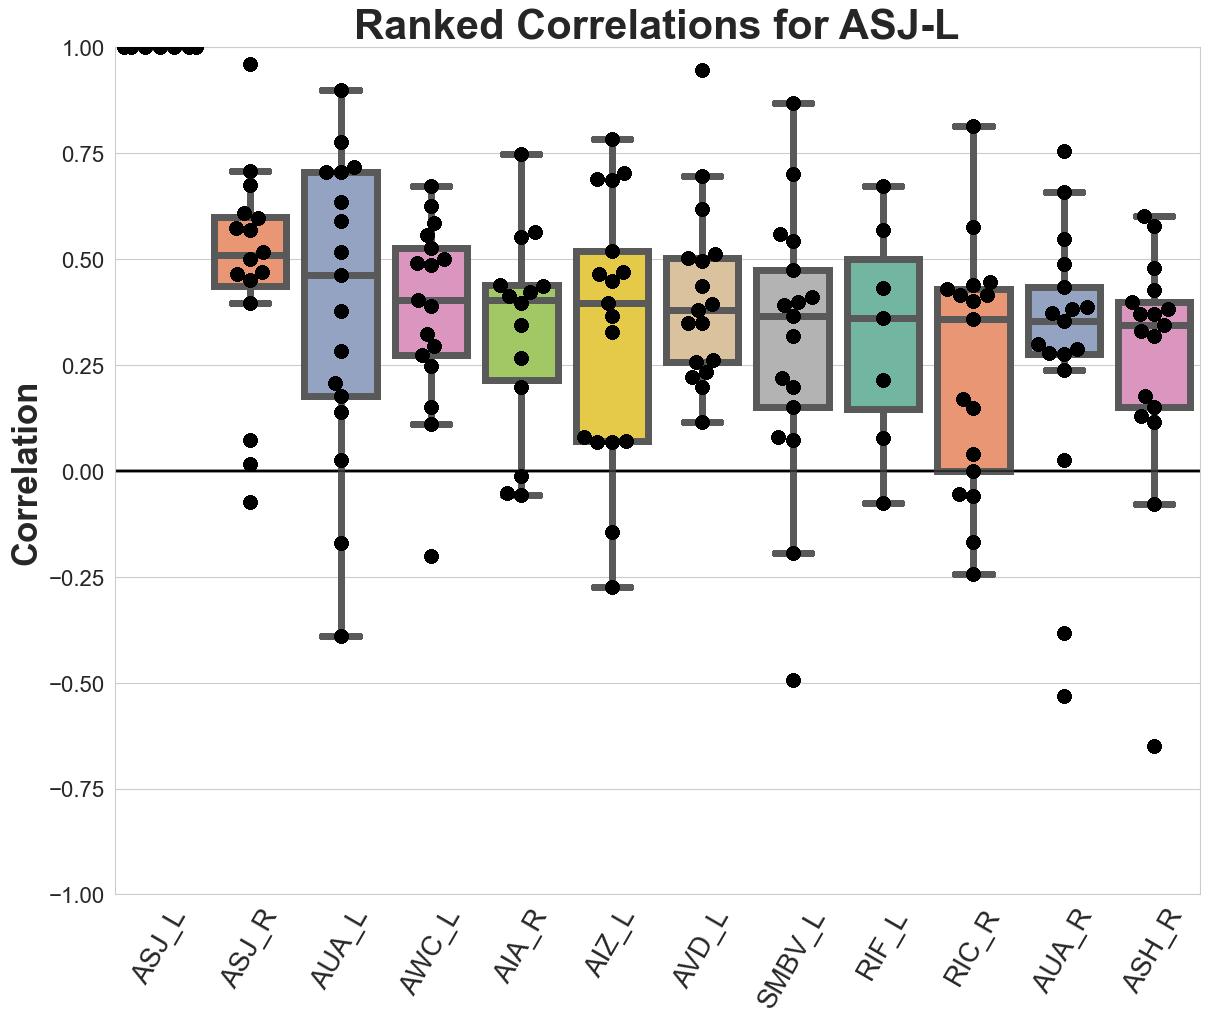

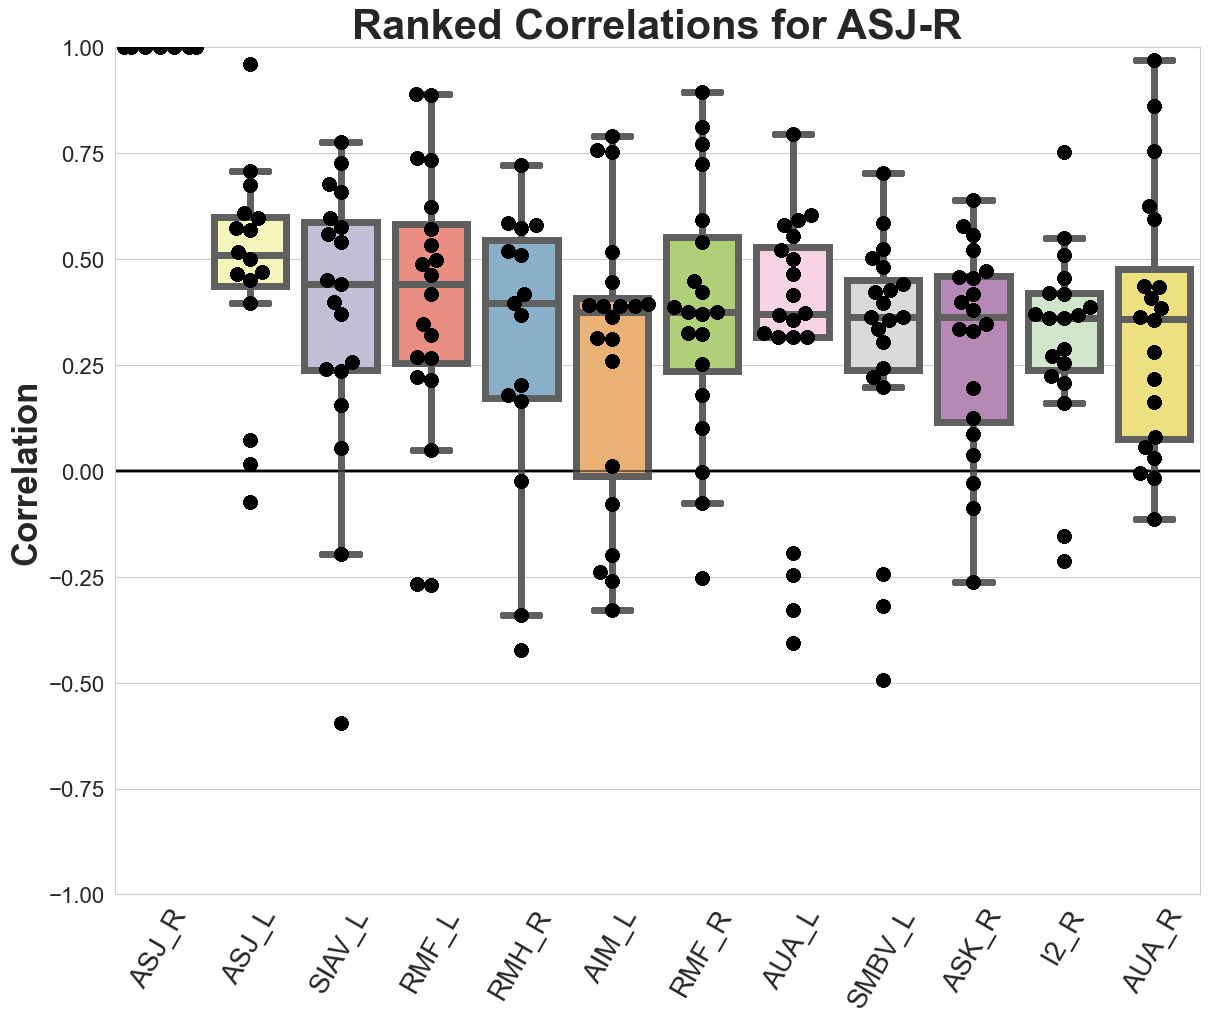

In [23]:
# This is plotting the top 10
dF_L = pd.DataFrame(top10_rank_ASJ_L.T, columns=top10_rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
#print(dF_L)

sns.set_style("whitegrid")
colors1 = sns.color_palette("Set2") #If you look up 'matplotlib colormap reference' you can find a list of options

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w') #this establishes the plotting
for i in top10_rank_ASJ_L.T: #this is for plotting the connecting lines, normally you don't need to loop to plot
    ax.set_title('Ranked Correlations for ASJ-L', fontsize=30, weight='bold') 
    sns.boxplot(data=dF_L, palette=colors1, linewidth = 5) 
    sns.swarmplot(data=dF_L, size=10, color='black') 
    #ax.plot(i, alpha=0.5) #this is for plotting those connecting lines
    plt.xticks(rotation=60) 
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5) #I drew a black line for number 0 because that shows no correlation
    #plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png', dpi = 900)



# Repeat the same things for ASJ R    
dF_R = pd.DataFrame(top10_rank_ASJ_R.T, columns=top10_rank_ASJ_R_names)
#print(dF_R)

sns.set_style("whitegrid")
colors2 = sns.color_palette("Set3")

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
for i in top10_rank_ASJ_R.T:
    ax.set_title('Ranked Correlations for ASJ-R', fontsize=30, weight='bold')
    sns.boxplot(data=dF_R, palette=colors2, linewidth = 5)
    sns.swarmplot(data=dF_R, size=10, color='black')
    #ax.plot(i, alpha=0.5)
    plt.xticks(rotation=60)
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5)
    #plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_R_Ranked_Correlations.png', dpi = 900)

/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


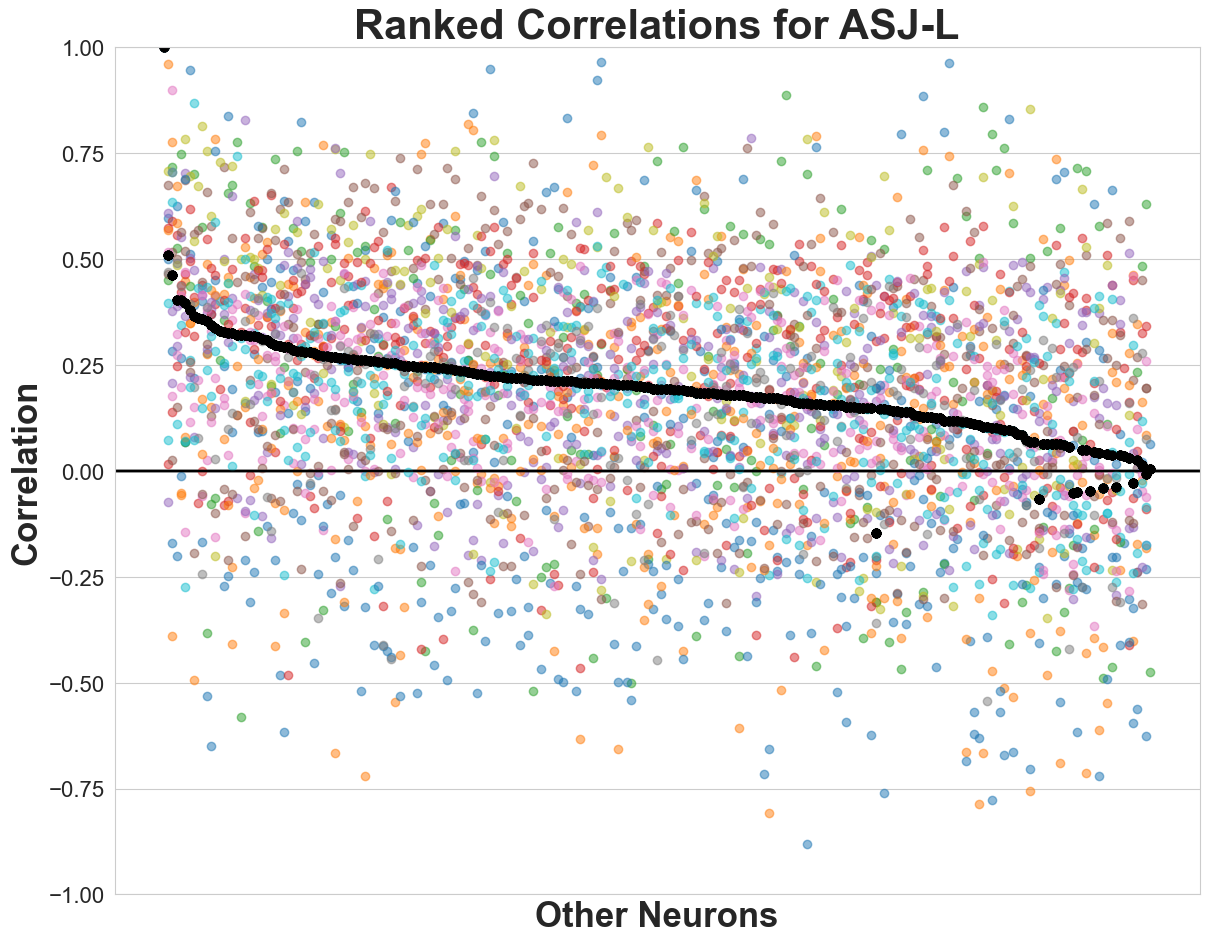

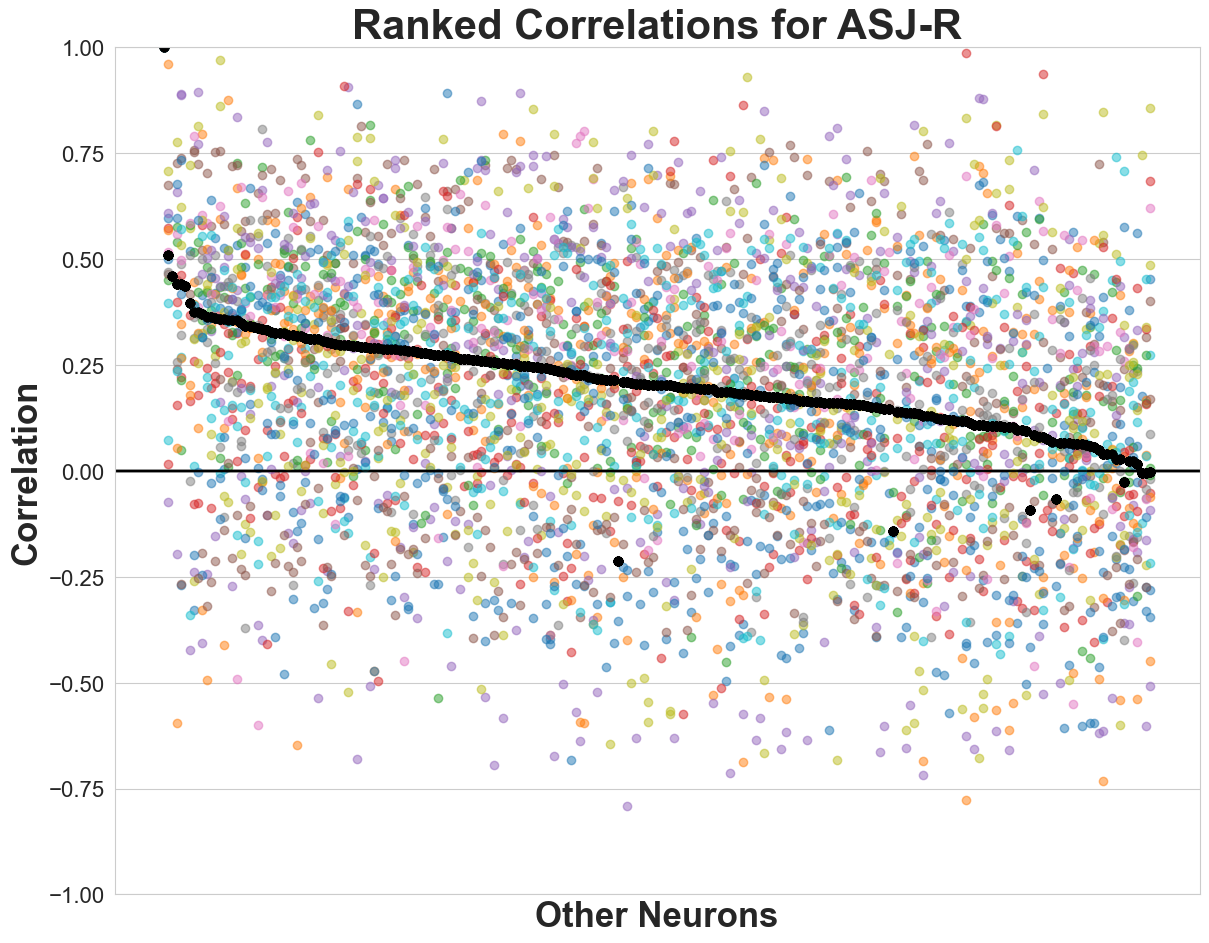

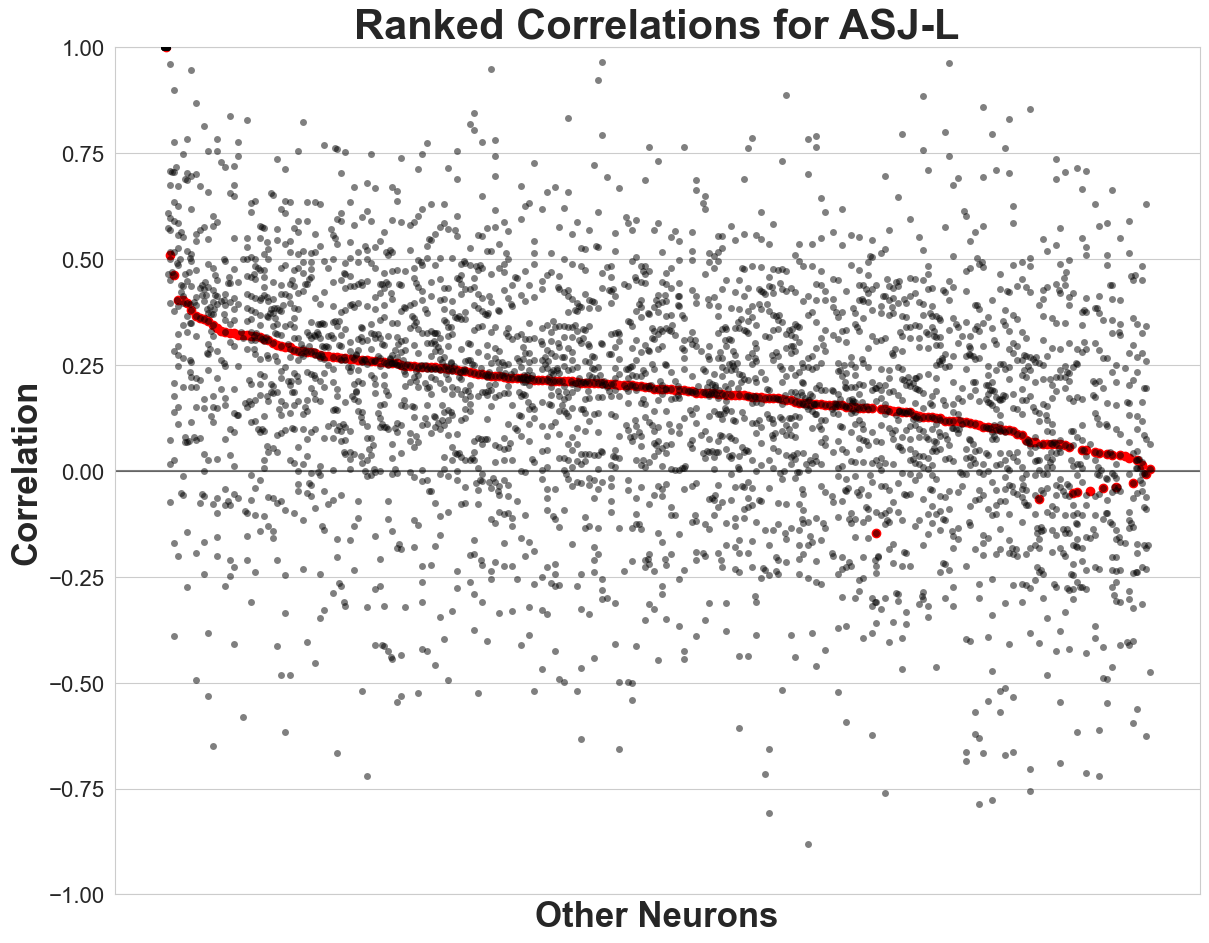

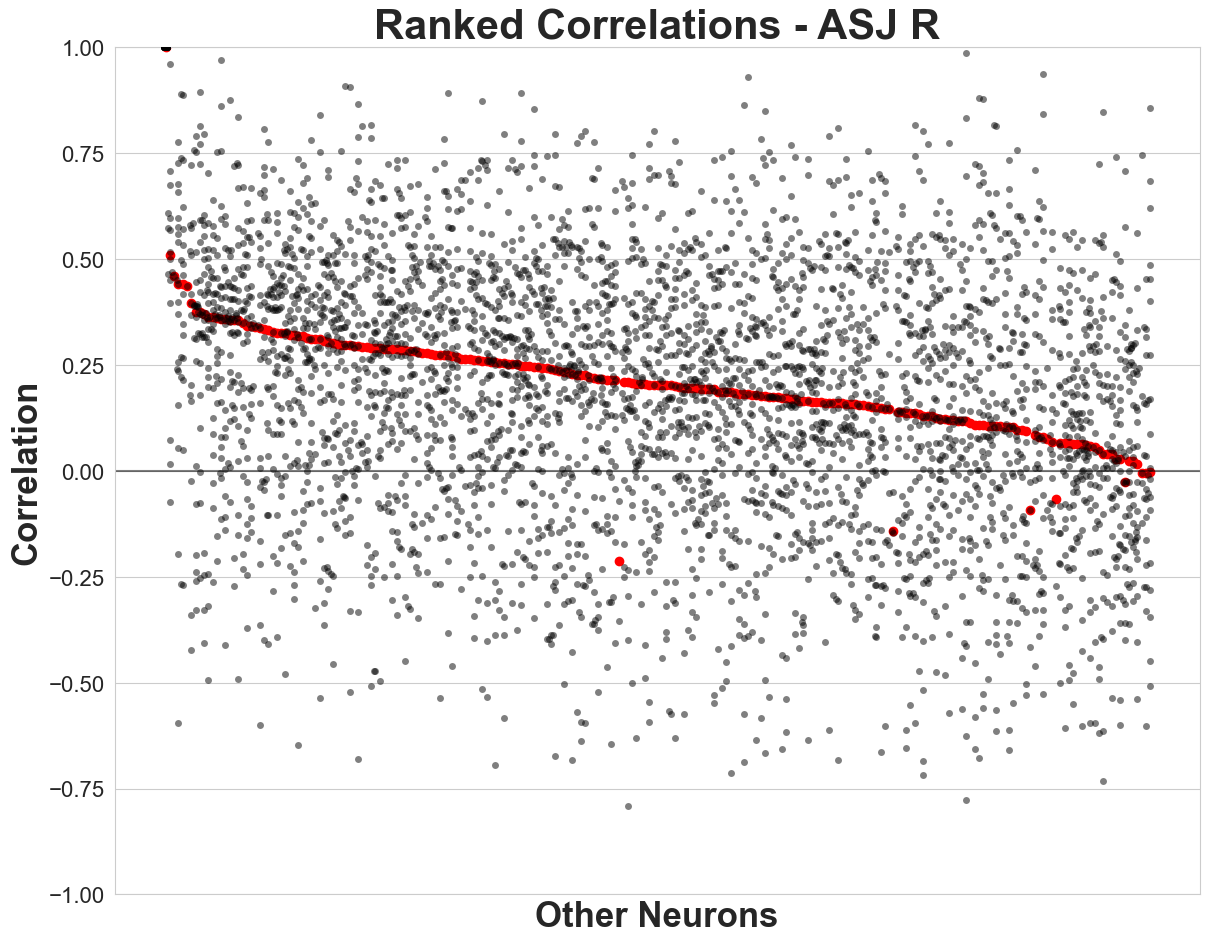

In [27]:
# This is plotting ALL the correlations, and I added the medians as a red color to show
# COLORFUL VERSION
sns.set_style("whitegrid")

count=1
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w') #this establishes the plotting
for i in rank_ASJ_L.T:
    ax.set_title('Ranked Correlations for ASJ-L', fontsize=30, weight='bold') #title
    #sns.swarmplot(data=dF_ALL_L, alpha=0) #plot each individual trial dot using swarmplot
    ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='black') #this is plotting the medians
    ax.plot(rank_ASJ_L_names, i,'o', alpha=0.5, label = count) 
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
    ax.set_xticks([])    
    ax.tick_params(axis= 'y', labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5) 
    count += 1
    #plt.savefig('031424 ASJ L Ranked Correlations.png') #here you can save your figure
 
# Repeat the same things for ASJ R    
#print(dF_R)
count=1
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
for i in rank_ASJ_R.T:
    ax.set_title('Ranked Correlations for ASJ-R', fontsize=30, weight='bold')
    ax.plot(rank_ASJ_R_names, i,'o', alpha=0.5, label = count)
    ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='black') #this is plotting the medians
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
    ax.set_xticks([])
    ax.tick_params(axis= 'y', labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5)
    count += 1
    #plt.savefig('031424 ASJ R Ranked Correlations.png')

# This is plotting ALL the correlations, and I added the medians as a red color to show
# BLACK/RED VERSION

dF_ALL_L = pd.DataFrame(rank_ASJ_L.T, columns=rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
#print(dF_L)
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
ax.set_title('Ranked Correlations for ASJ-L', fontsize=30, weight='bold')
sns.swarmplot(data=dF_ALL_L, color='black', alpha=0.5)
ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='red') #this is plotting the medians
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
ax.set_xticks([])
ax.tick_params(axis= 'y', labelsize=16)
ax.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
    #plt.savefig('031424 ASJ L Ranked Correlations.png') #here you can save your figure

# Repeat the same things for ASJ R    
dF_ALL_R = pd.DataFrame(rank_ASJ_R.T, columns=rank_ASJ_R_names)
#print(dF_R)

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
sns.swarmplot(data=dF_ALL_R, color='black', alpha=0.5)
ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='red') #this is plotting the medians
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
ax.set_xticks([])
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('031424 ASJ R Ranked Correlations.png')
    

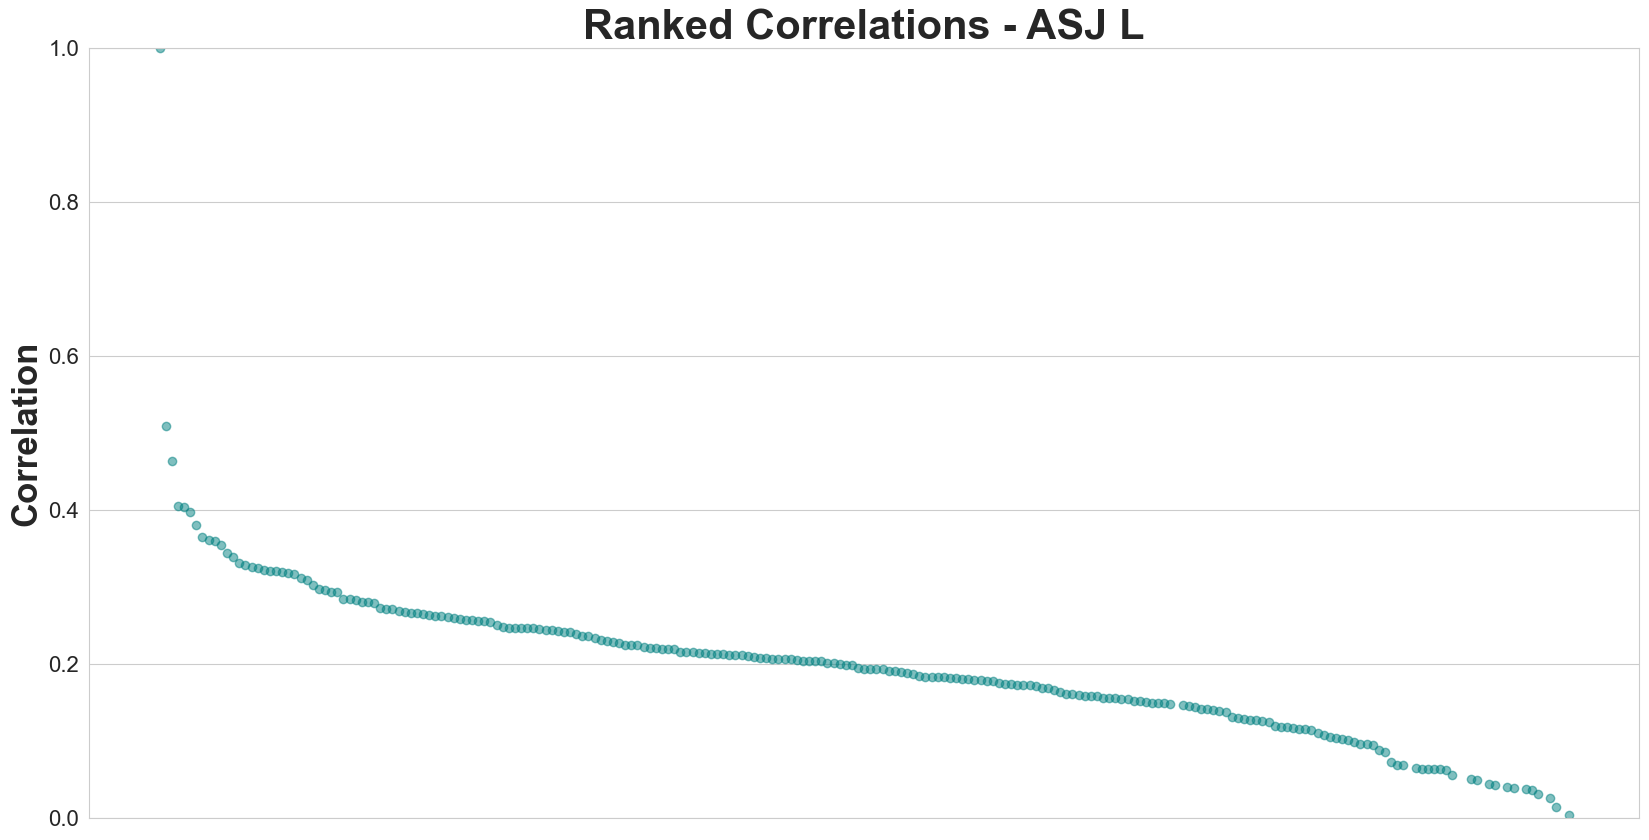

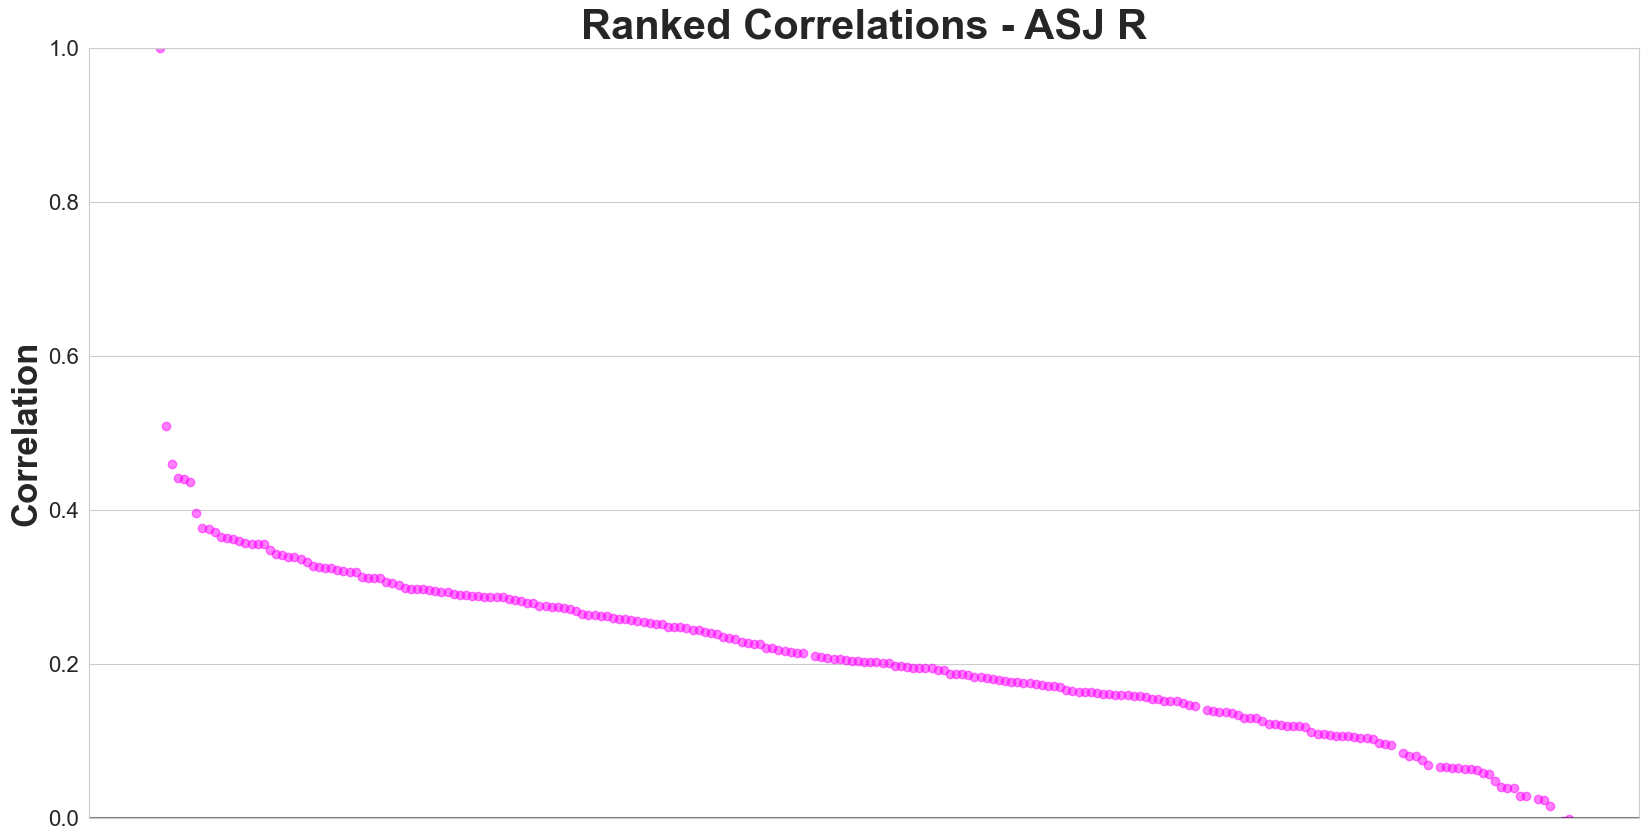

In [32]:
## This is just plotting the absolute value medians ##

fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor='w') #this establishes the plotting
ax.set_title('Ranked Correlations - ASJ L', fontsize=30, weight='bold') #title
ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='teal', alpha=0.5)
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.tick_params(axis= 'y', labelsize=16)
ax.set_xticks([])
ax.set_ylim([0,1])
#plt.savefig('031424 ASJ L Ranked Correlations.png') #here you can save your figure

fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor='w')
ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='fuchsia', alpha=0.5)
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.tick_params(axis= 'y', labelsize=16)
ax.set_xticks([])
ax.set_ylim([0,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('031424 ASJ R Ranked Correlations.png')
    

In [ ]:
## If you want to plot individual traces, proceed below

In [29]:
# Here I wanted to color-code the stimuli that was delivered since it is randomized 
# This will help you organize the data based on stimuli that was delivered

print(head1['stims'])
# 1 = butanone = paleturquoise
# 2 = pentanedoine = pink
# 3 = NaCl = yellow

color1 = []
color2 = []
color3 = []

for i in head1['stims']:
    if i[0] == 1:
        color1.append('paleturquoise')
    if i[0] == 2:
        color1.append('pink')
    if i[0] == 3:
        color1.append('yellow')
        
    if i[1] == 1:
        color2.append('paleturquoise')
    if i[1] == 2:
        color2.append('pink')
    if i[1] == 3:
        color2.append('yellow')
        
    if i[2] == 1:
        color3.append('paleturquoise')
    if i[2] == 2:
        color3.append('pink')
    if i[2] == 3:
        color3.append('yellow')

print(color1)

[[2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [2 1 3]
 [1 3 2]
 [1 3 2]
 [2 1 3]]
['pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'paleturquoise', 'paleturquoise', 'paleturquoise', 'paleturquoise', 'paleturquoise', 'pink', 'paleturquoise', 'paleturquoise', 'pink']


In [ ]:
# to find out frame times I converted seconds to frames
# second (x) * 4 = frame (y)
# I got the number 4 because it was the frames per second they said
# You can find out frames per second by: mat1['fps']
# This was useful because in mat1['stim_times'] they list what SECOND times they pulsed stimuli
# So I had to figure out what FRAME time I needed to color-code
# For example, 60.5 second stimulus pulse equals 242 frames (see below numbers for ax.axvspan, 242-282)

/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_61479/2910443982.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, figsize=(15,10), facecolor='w')


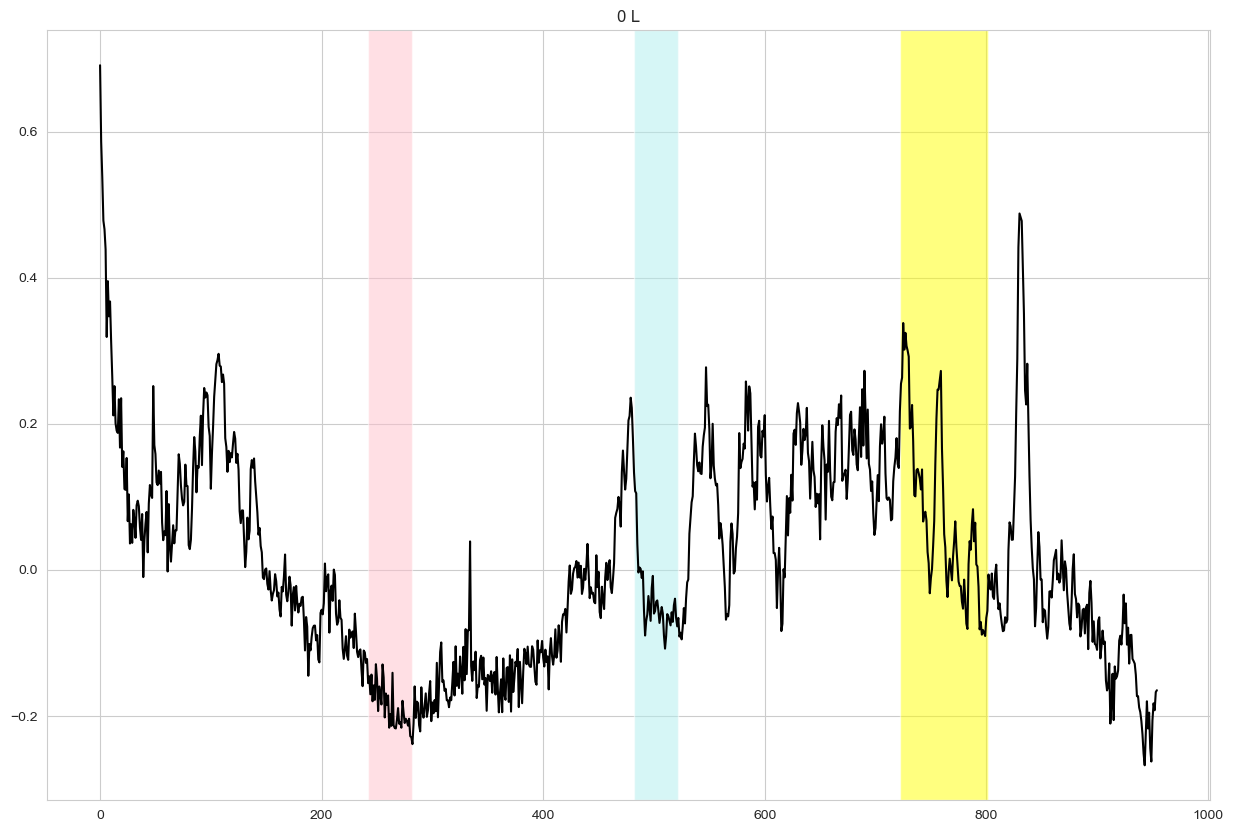

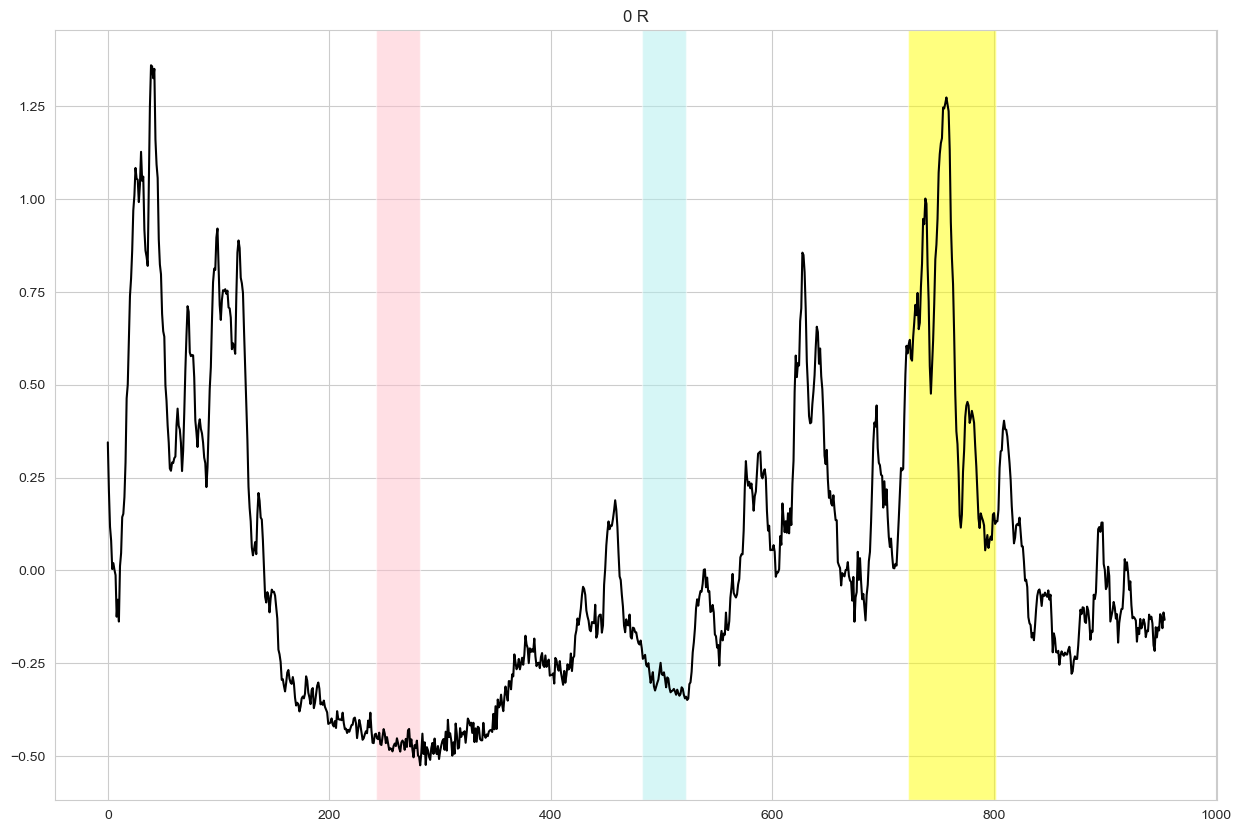

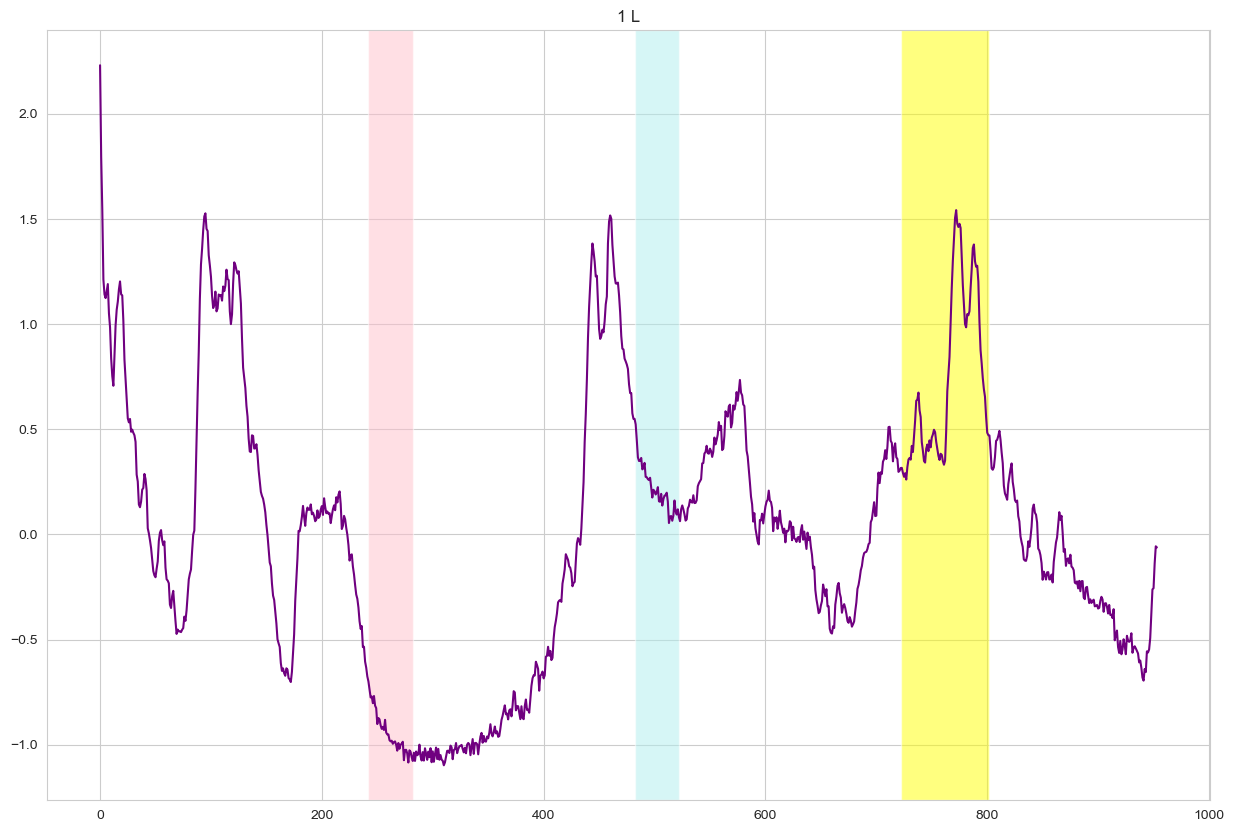

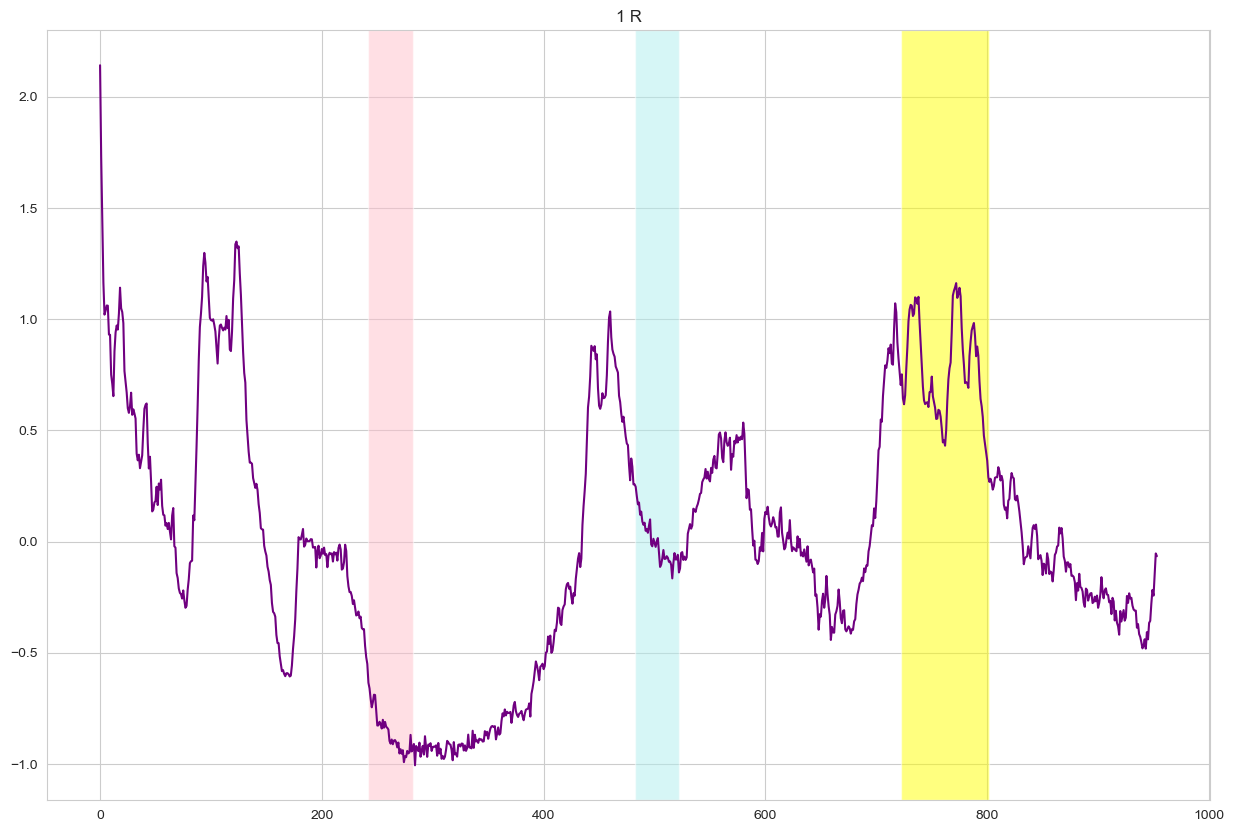

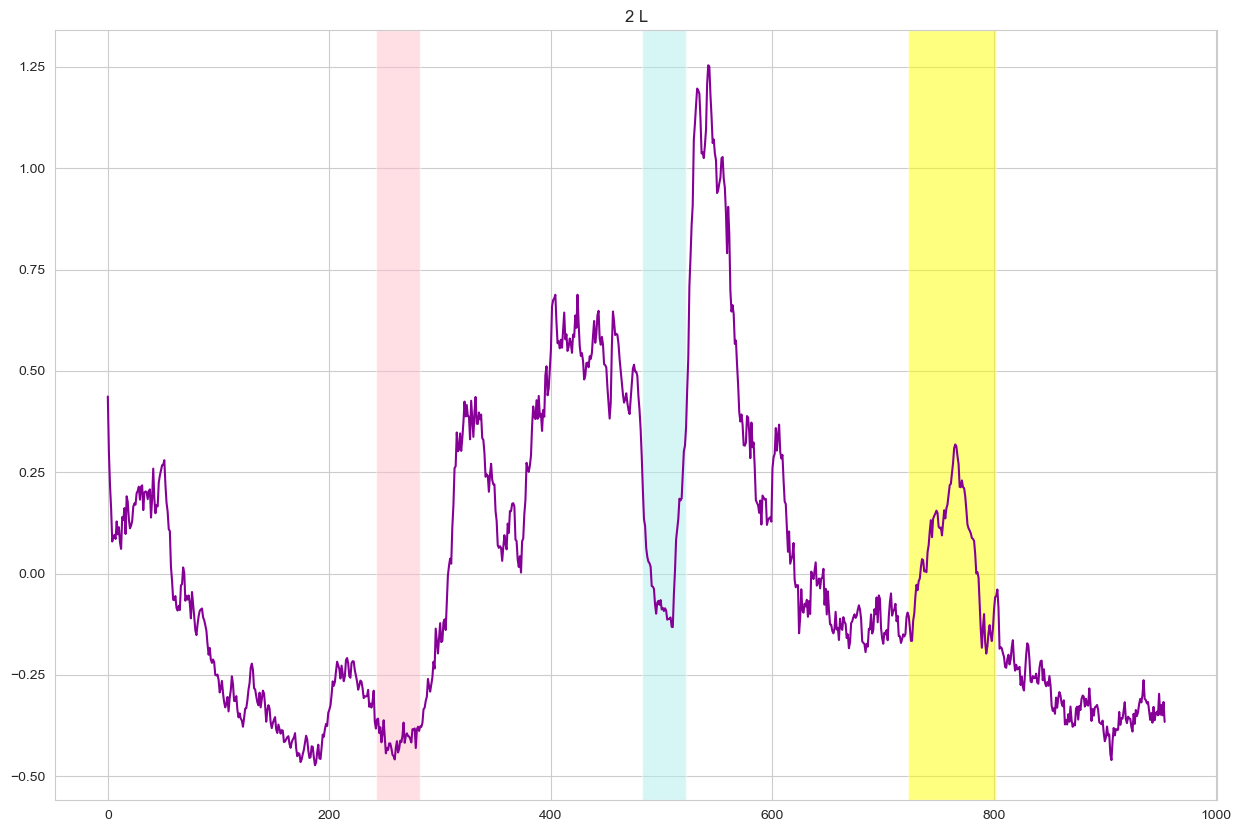

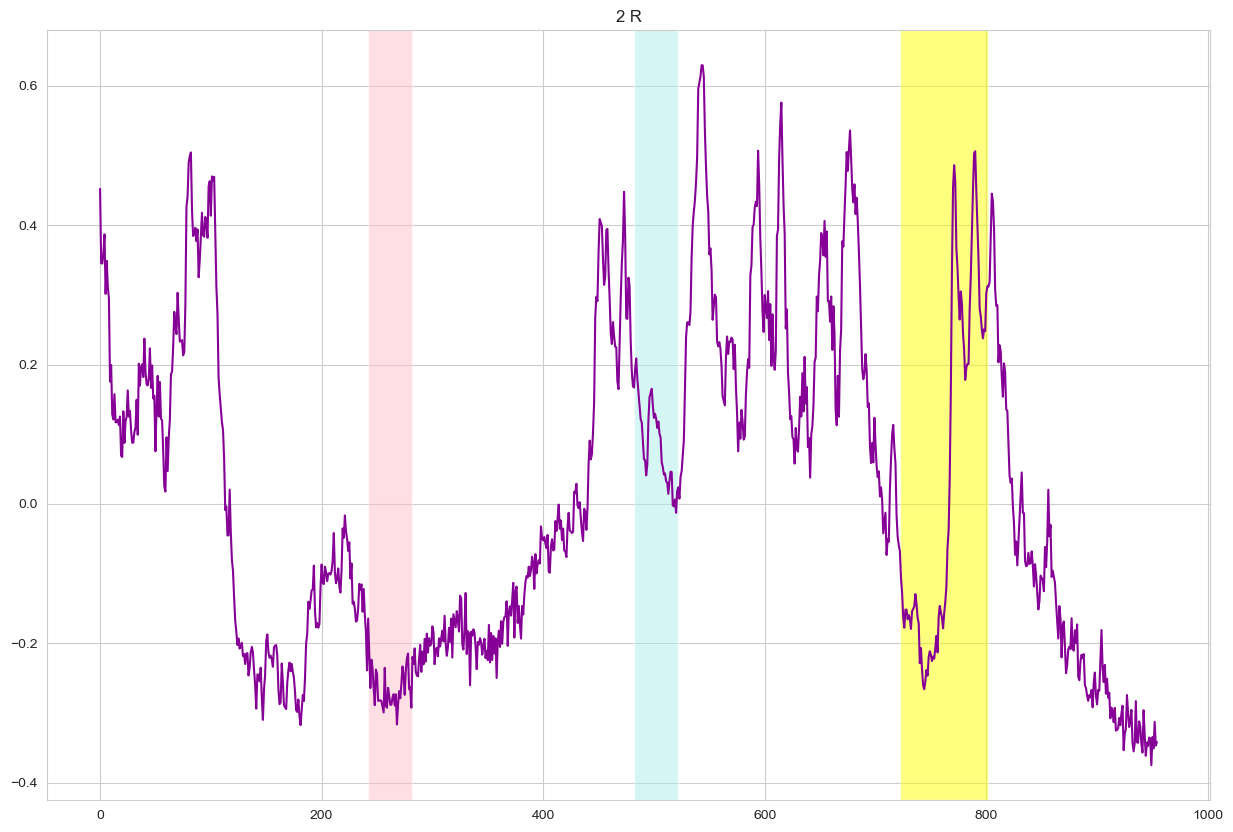

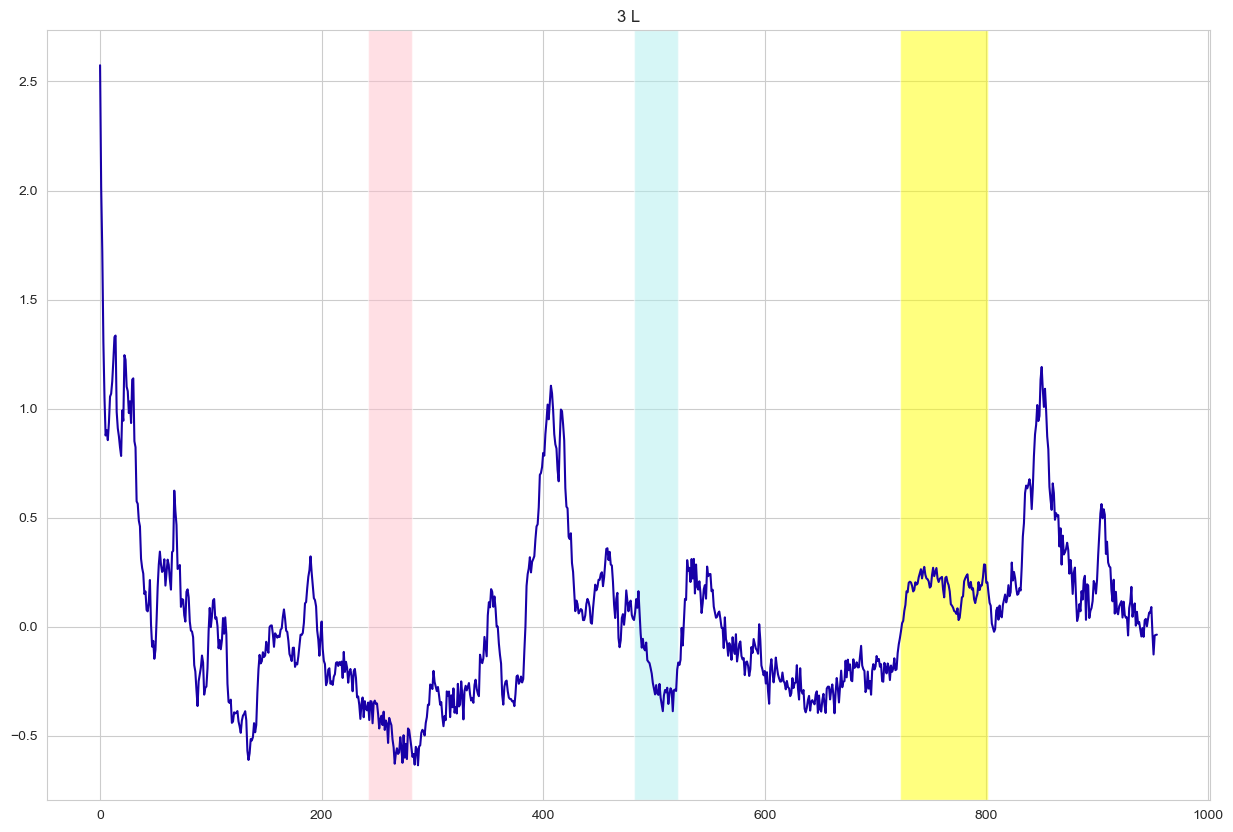

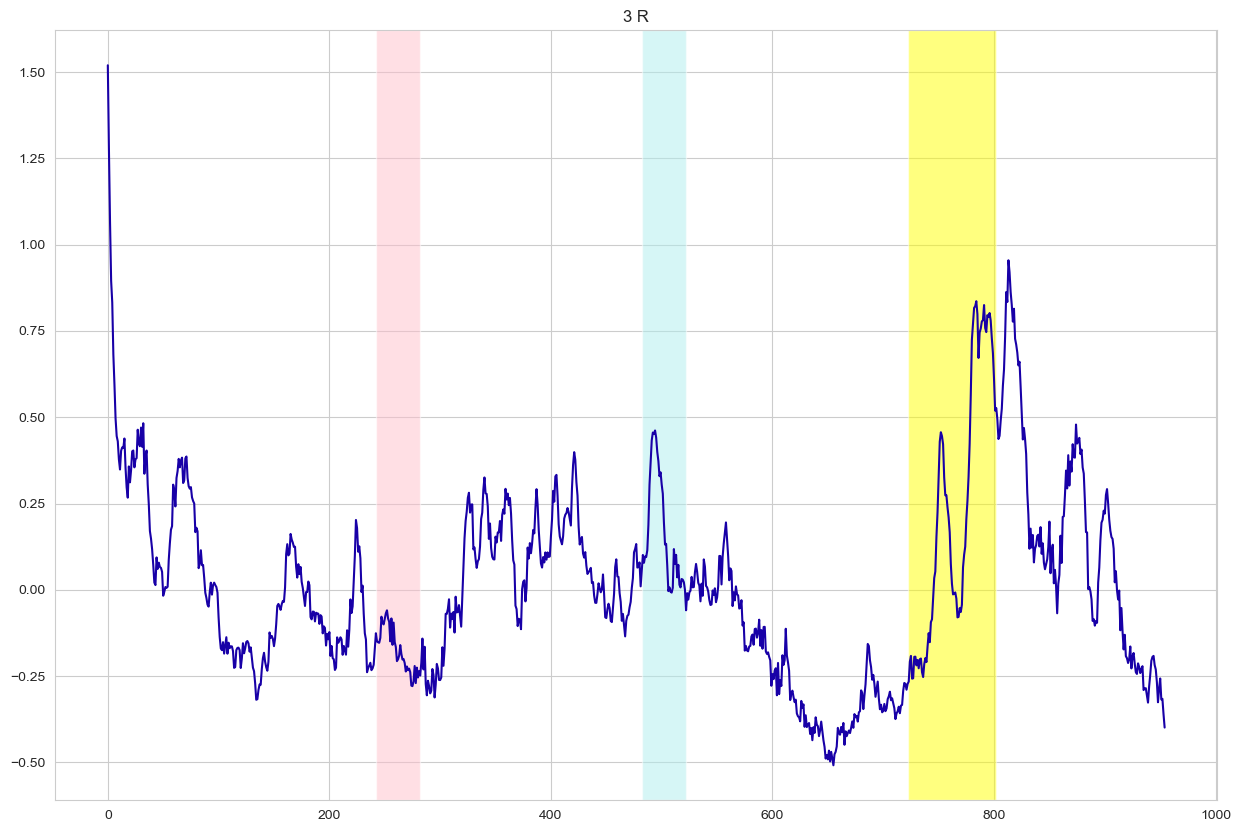

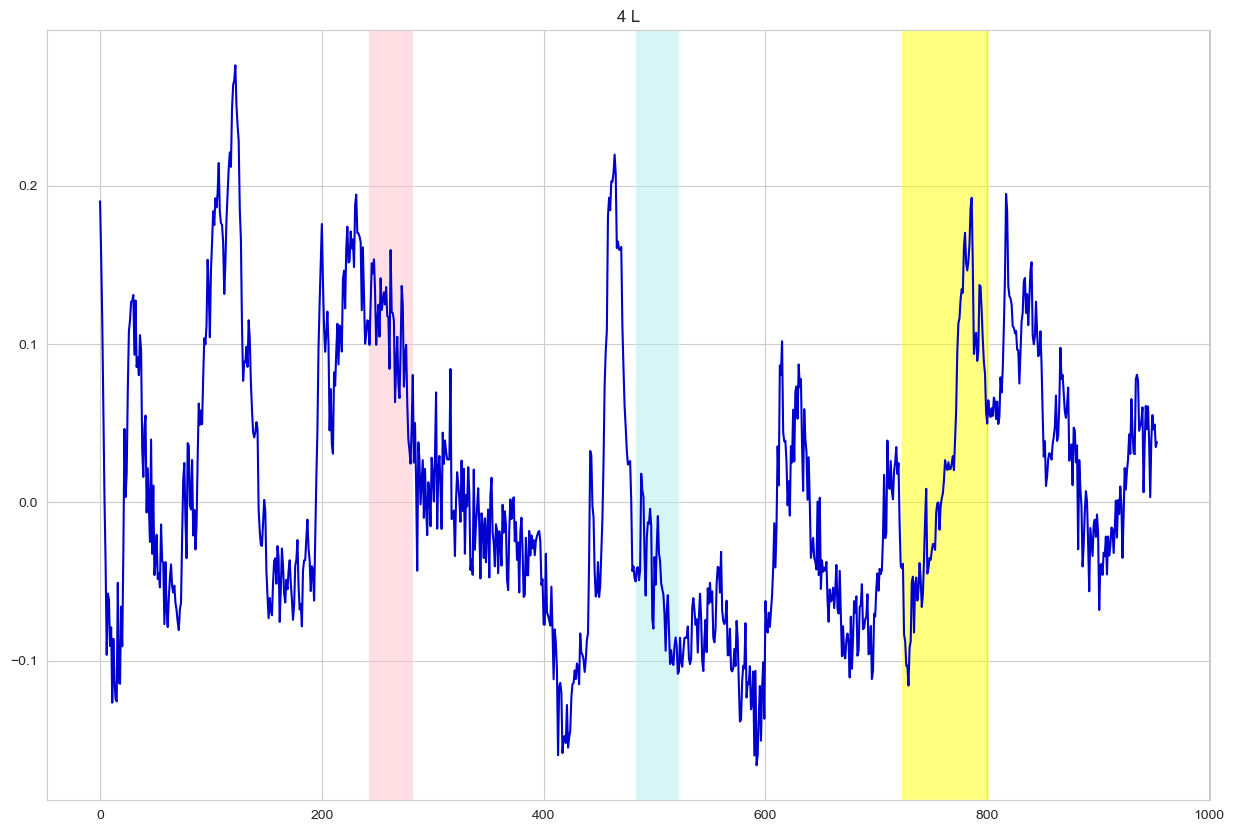

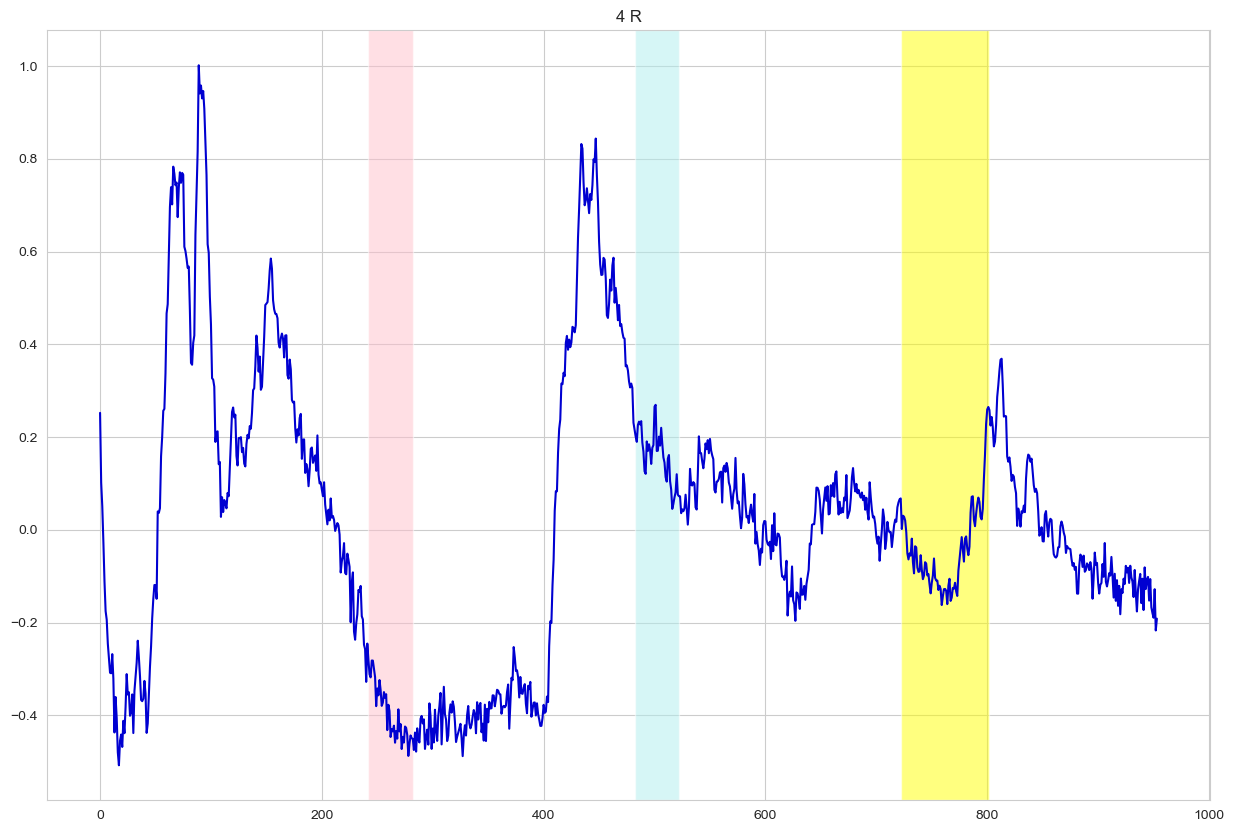

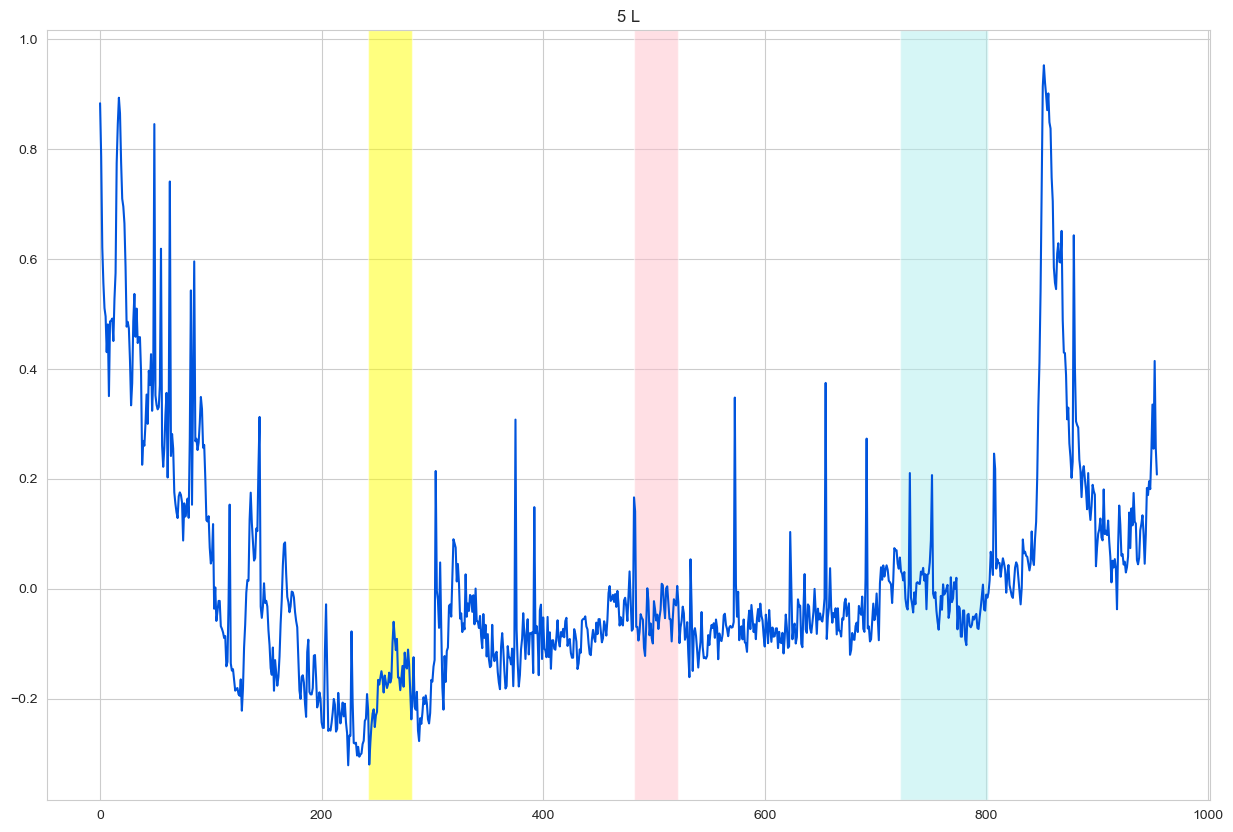

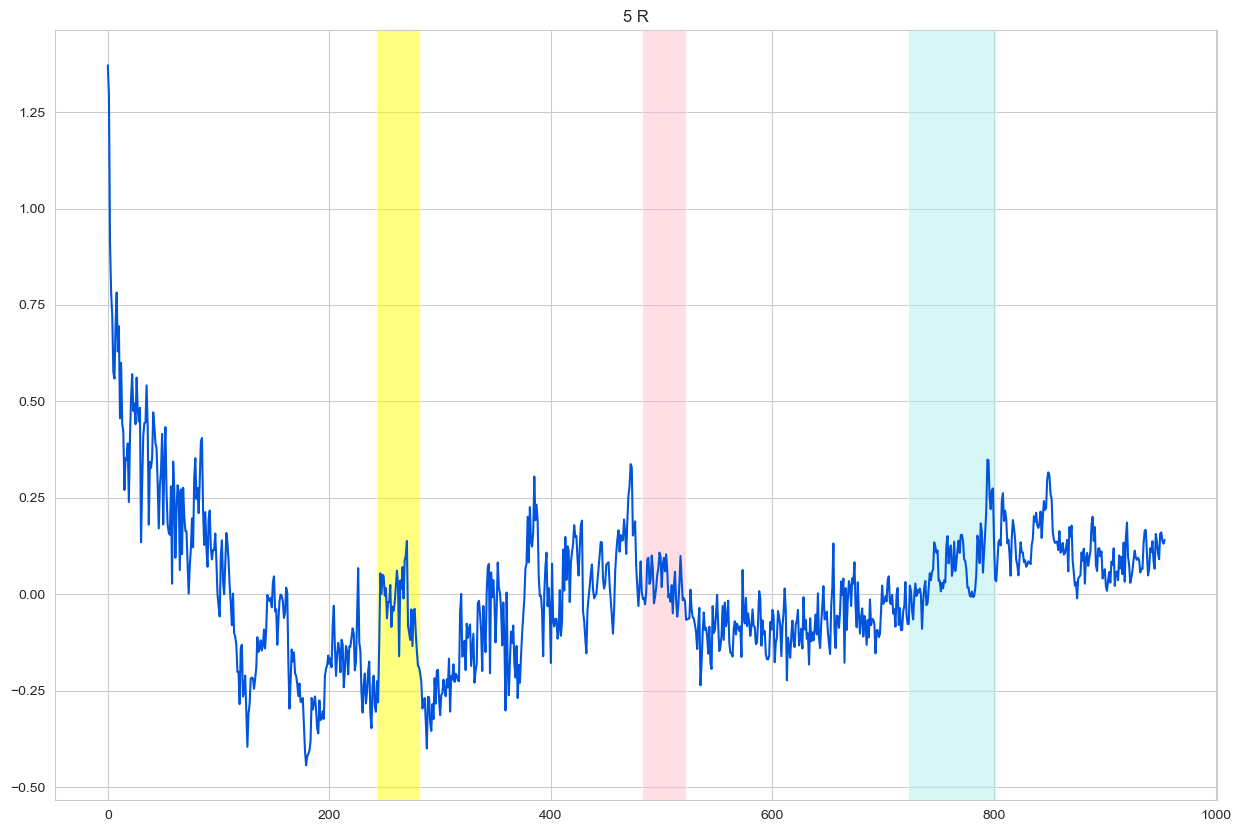

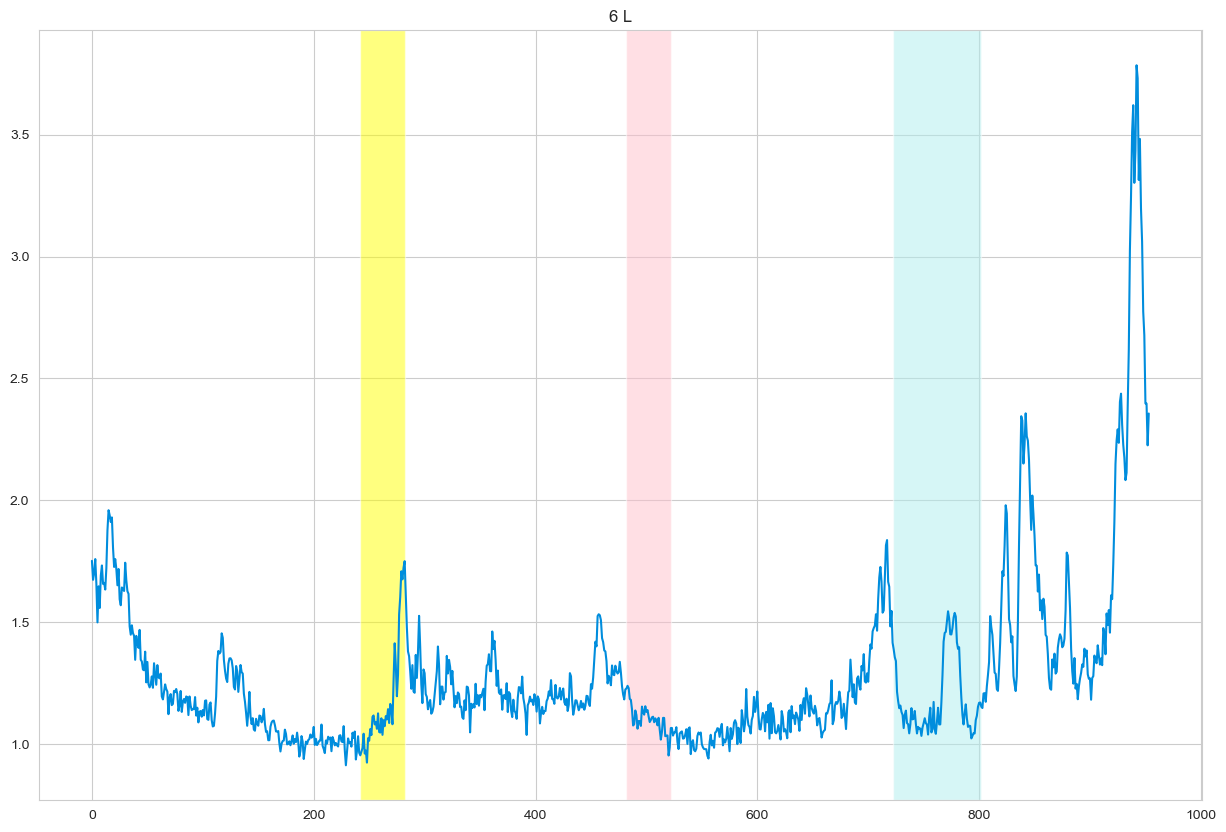

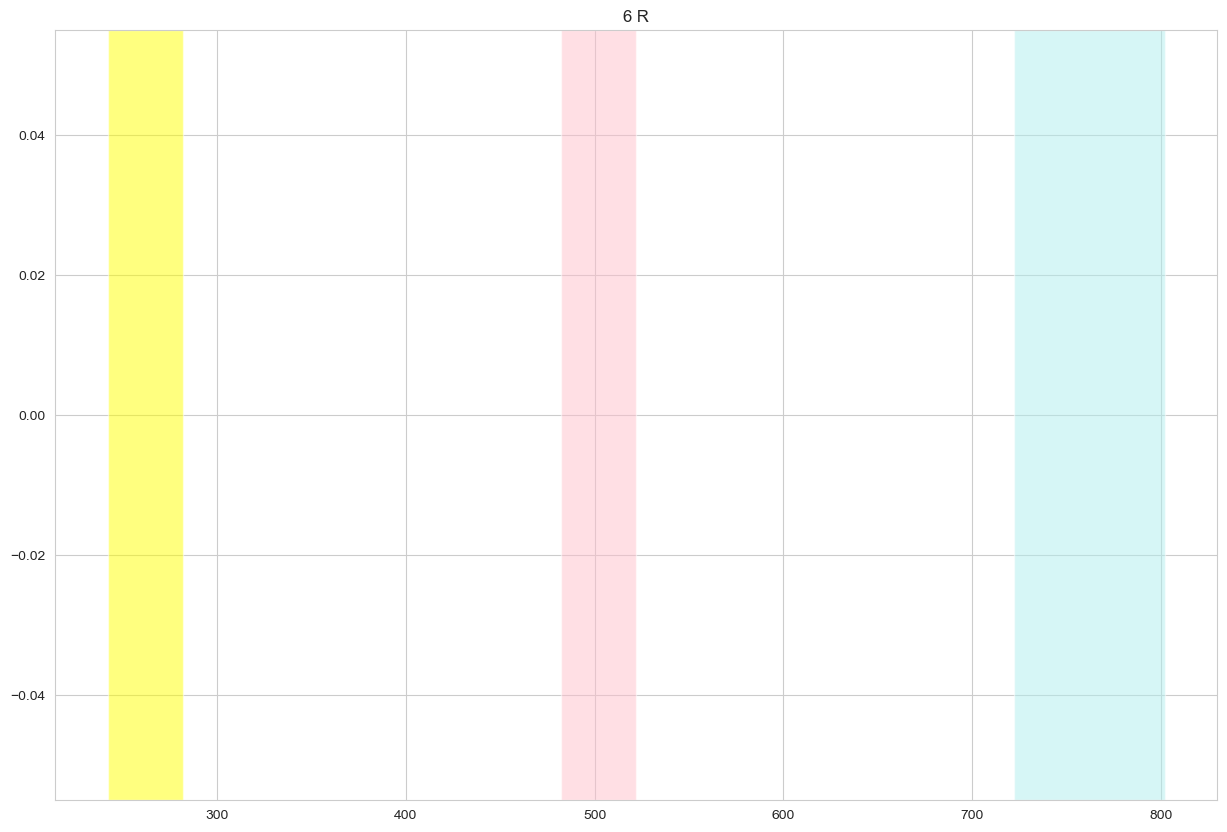

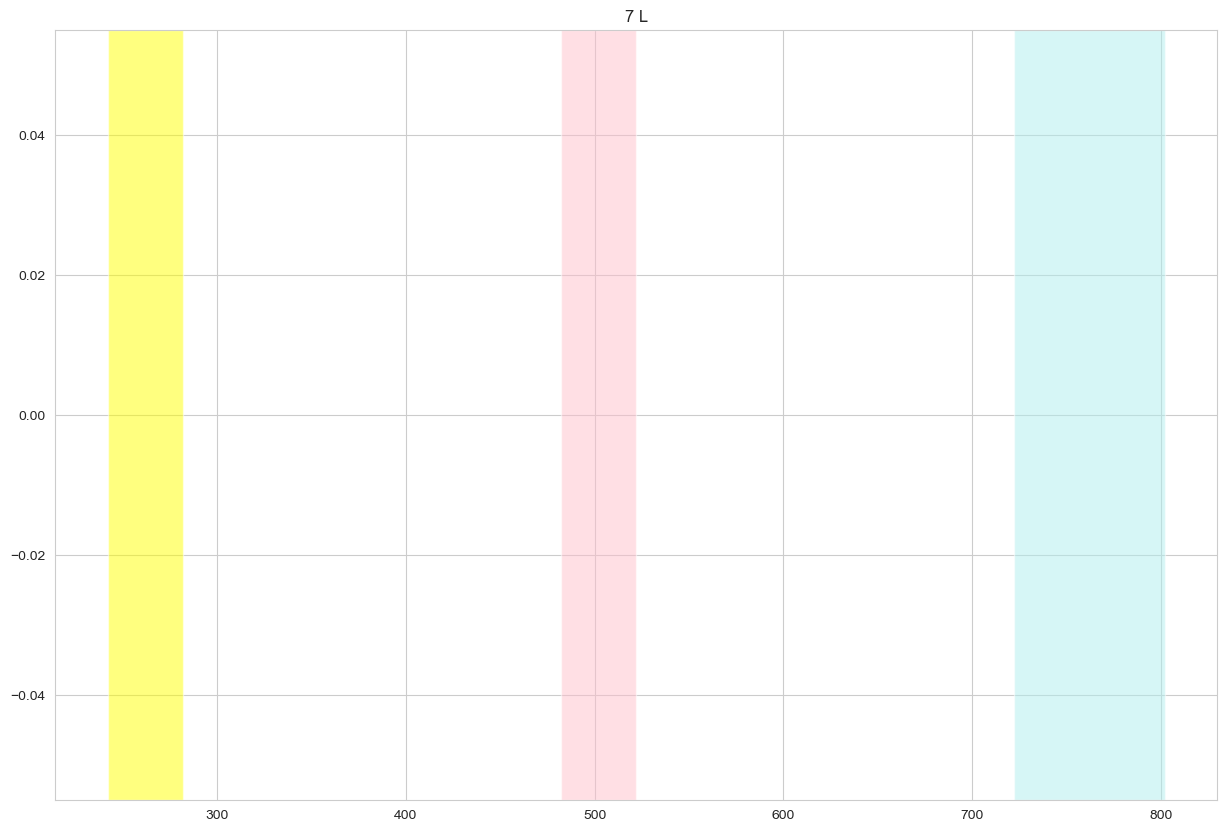

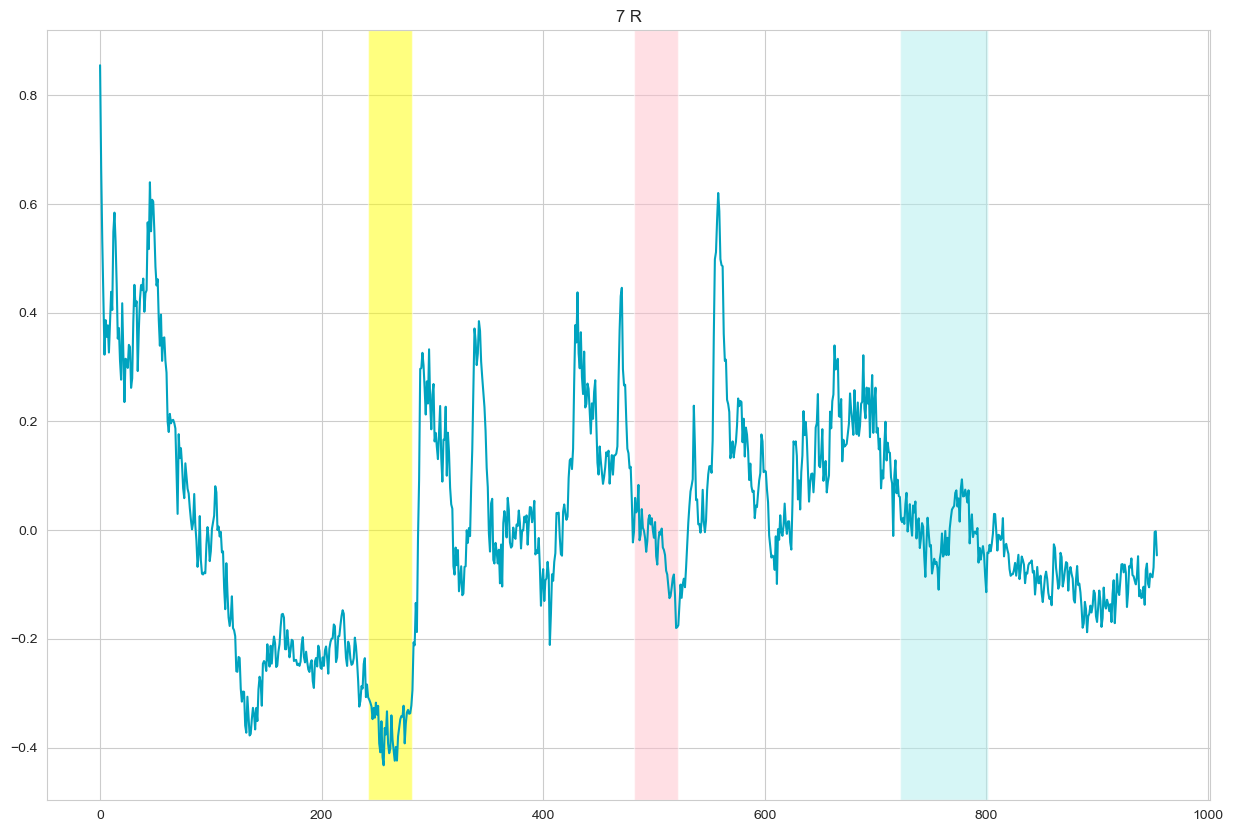

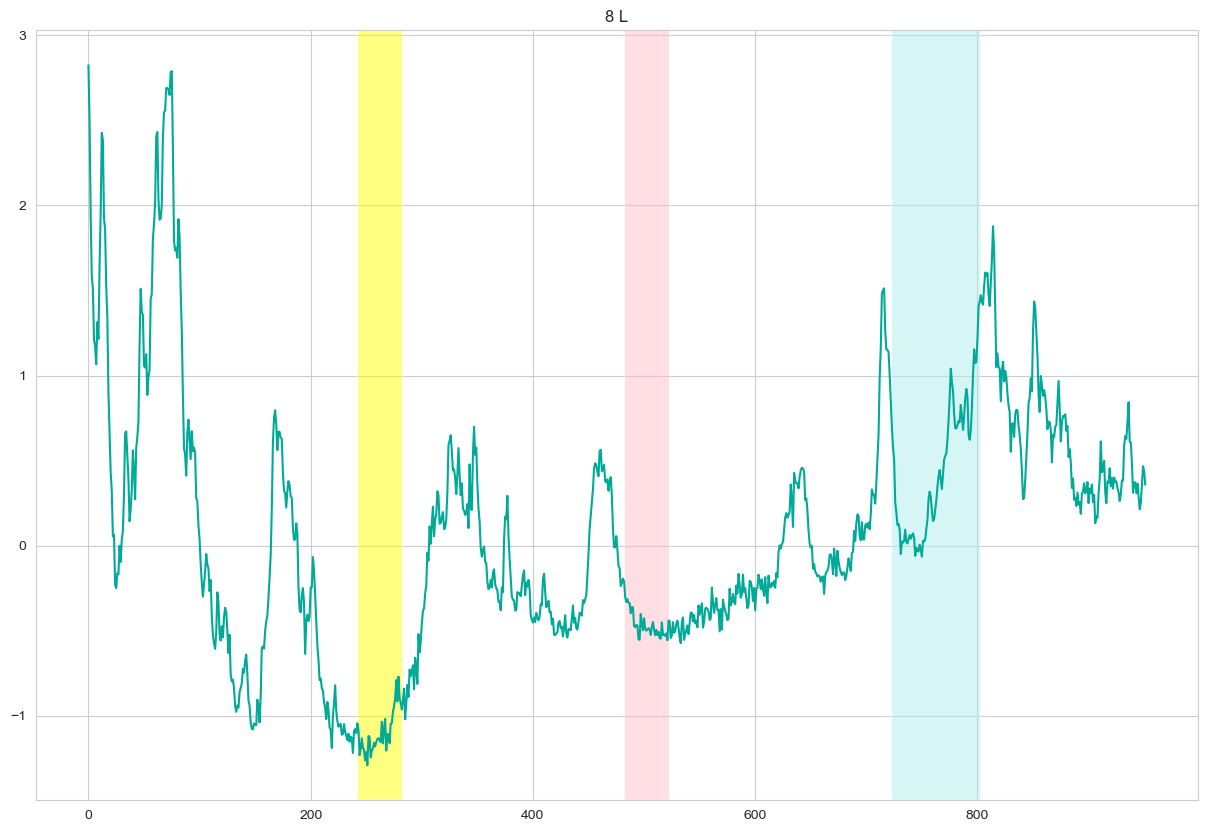

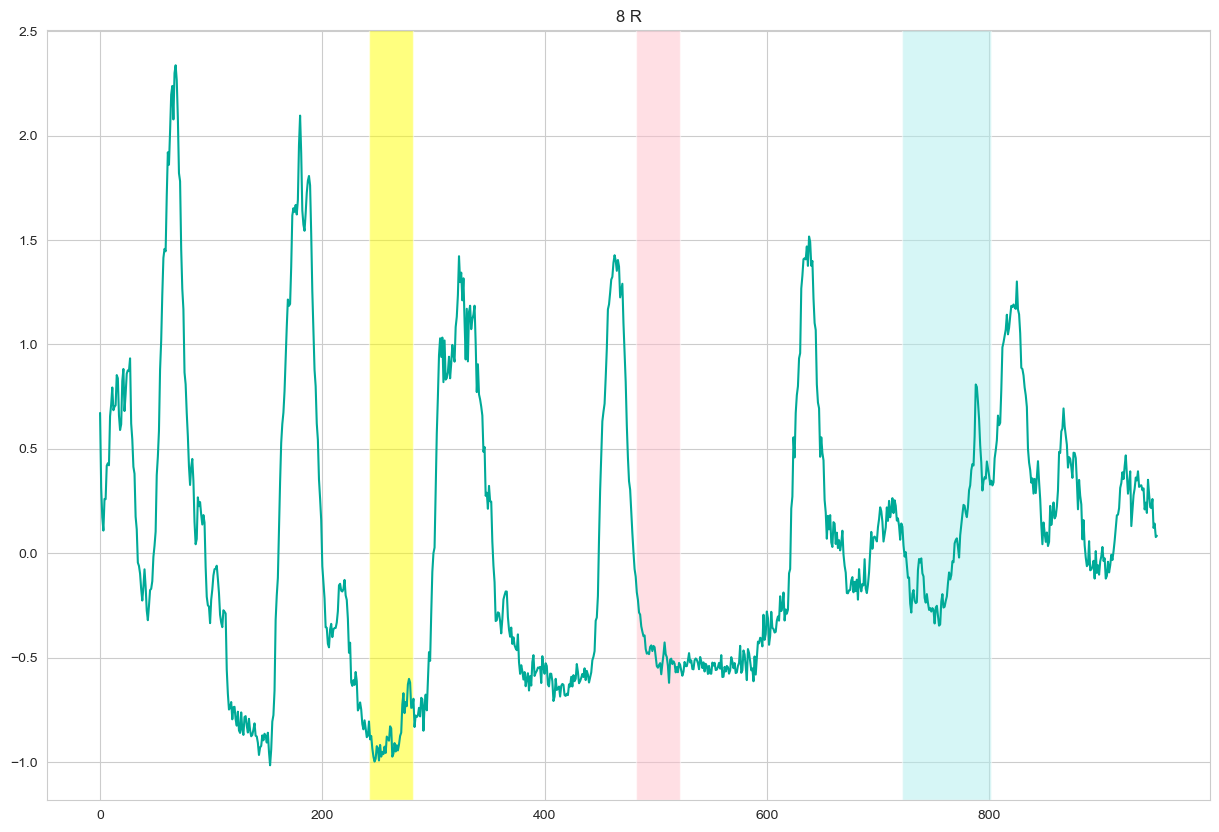

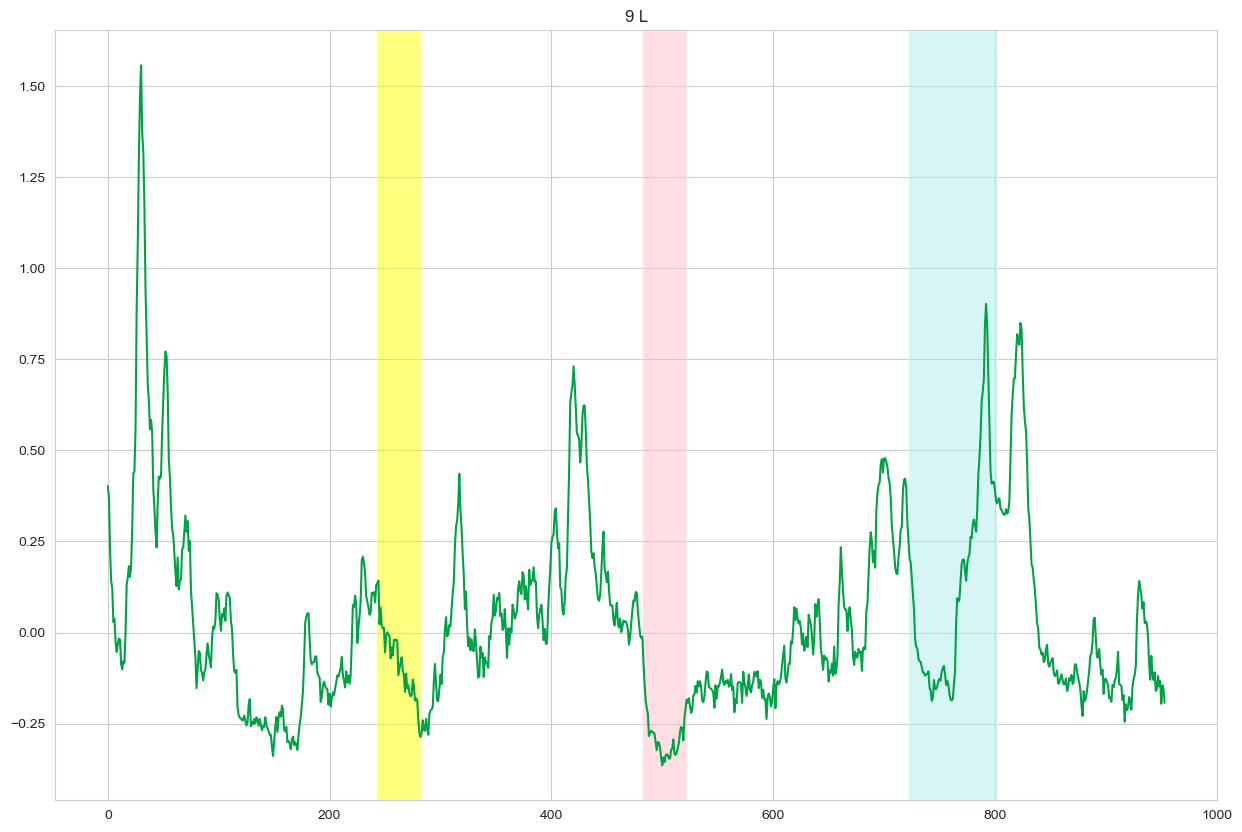

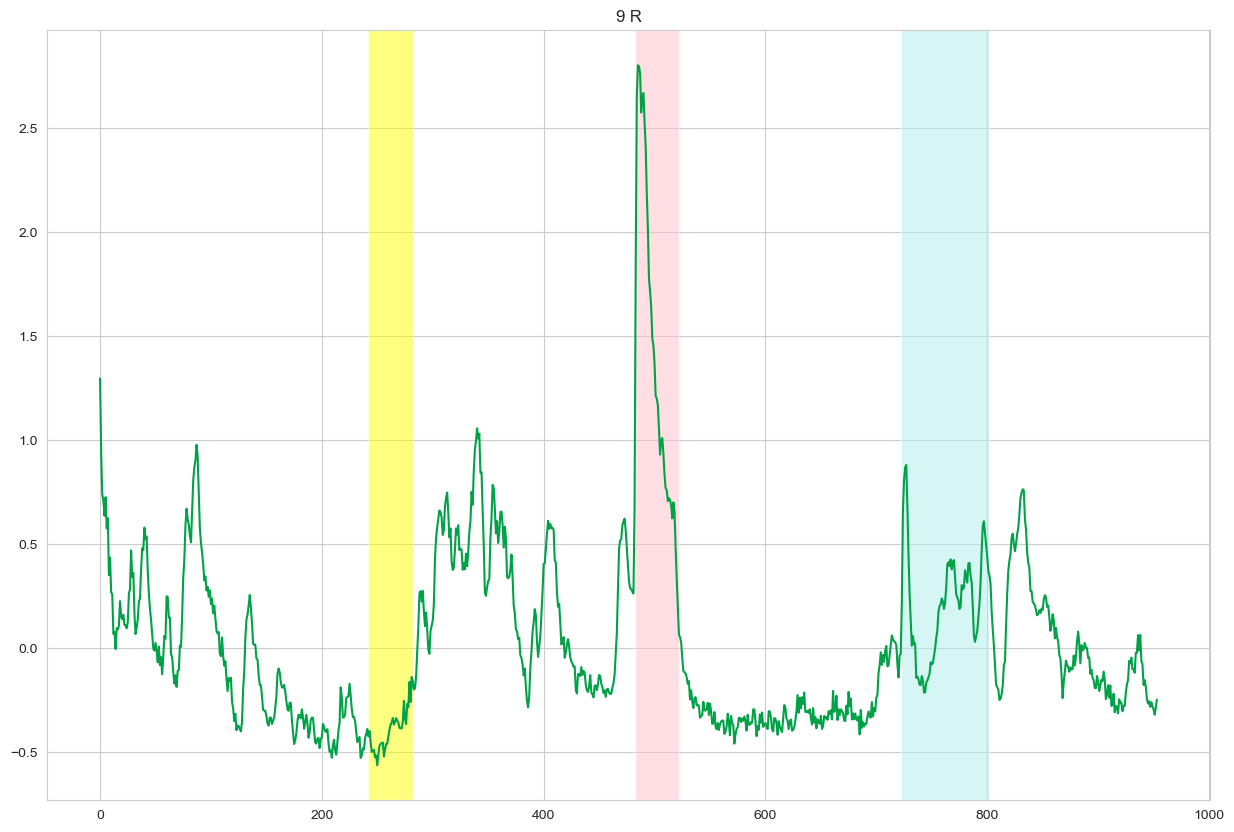

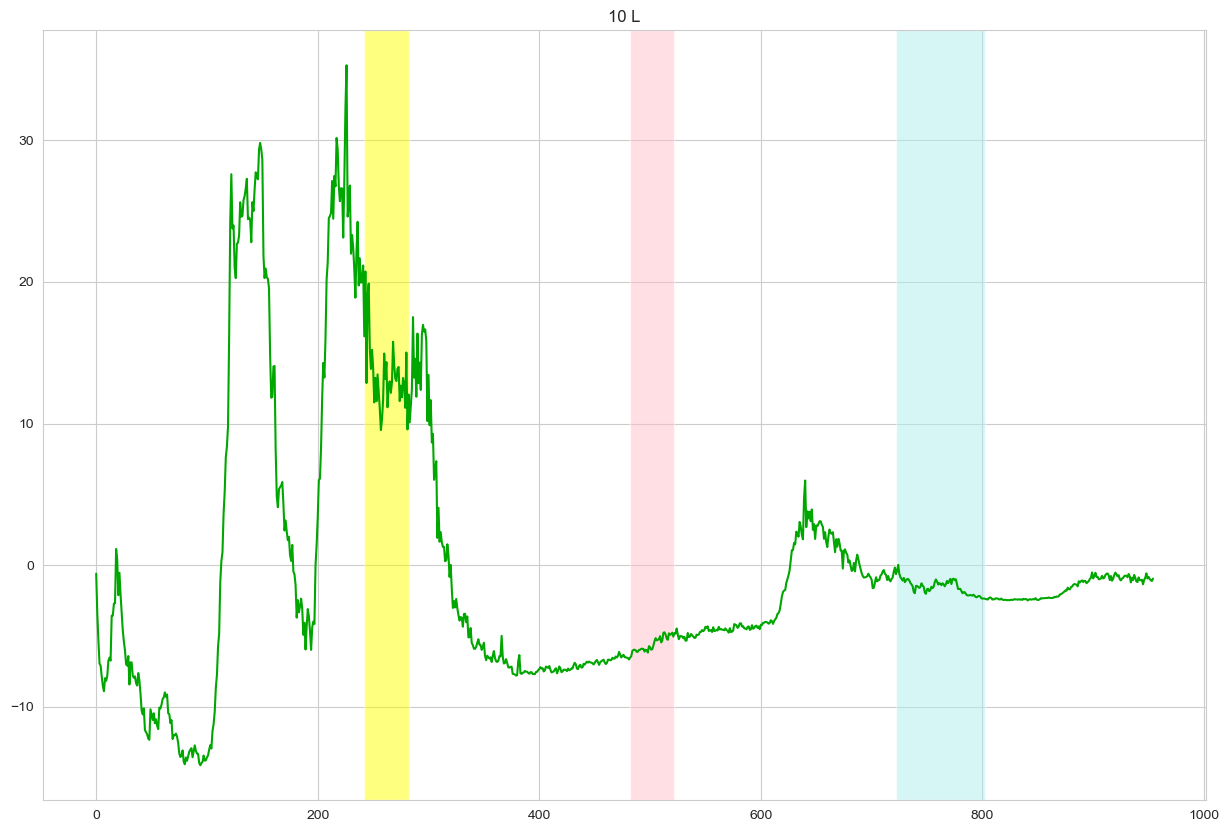

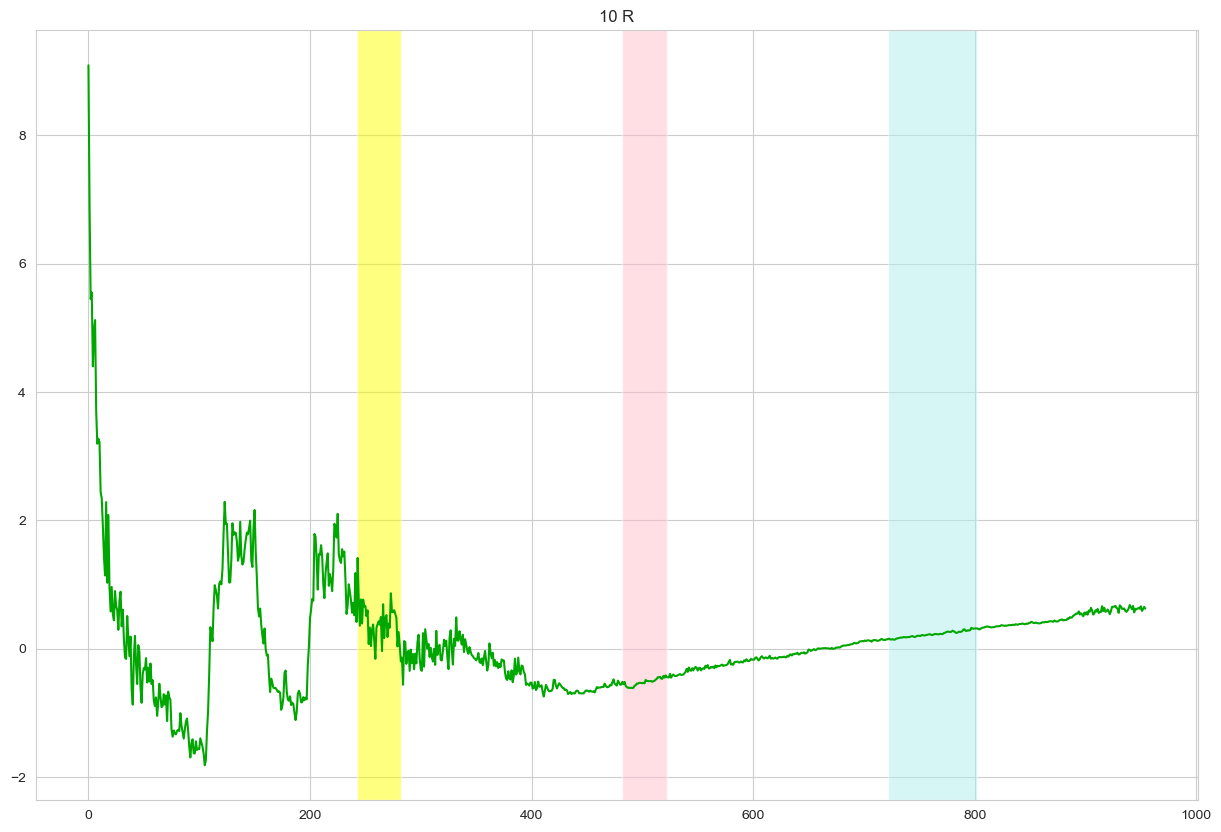

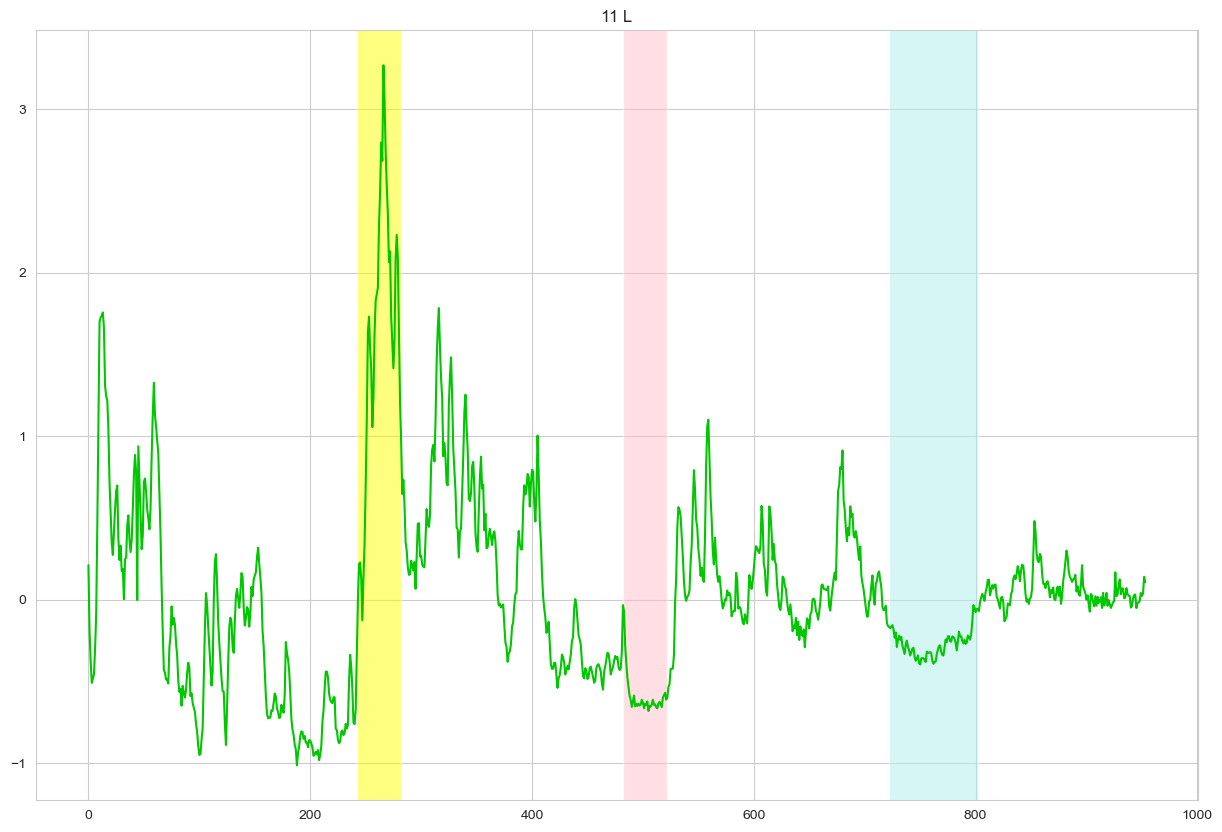

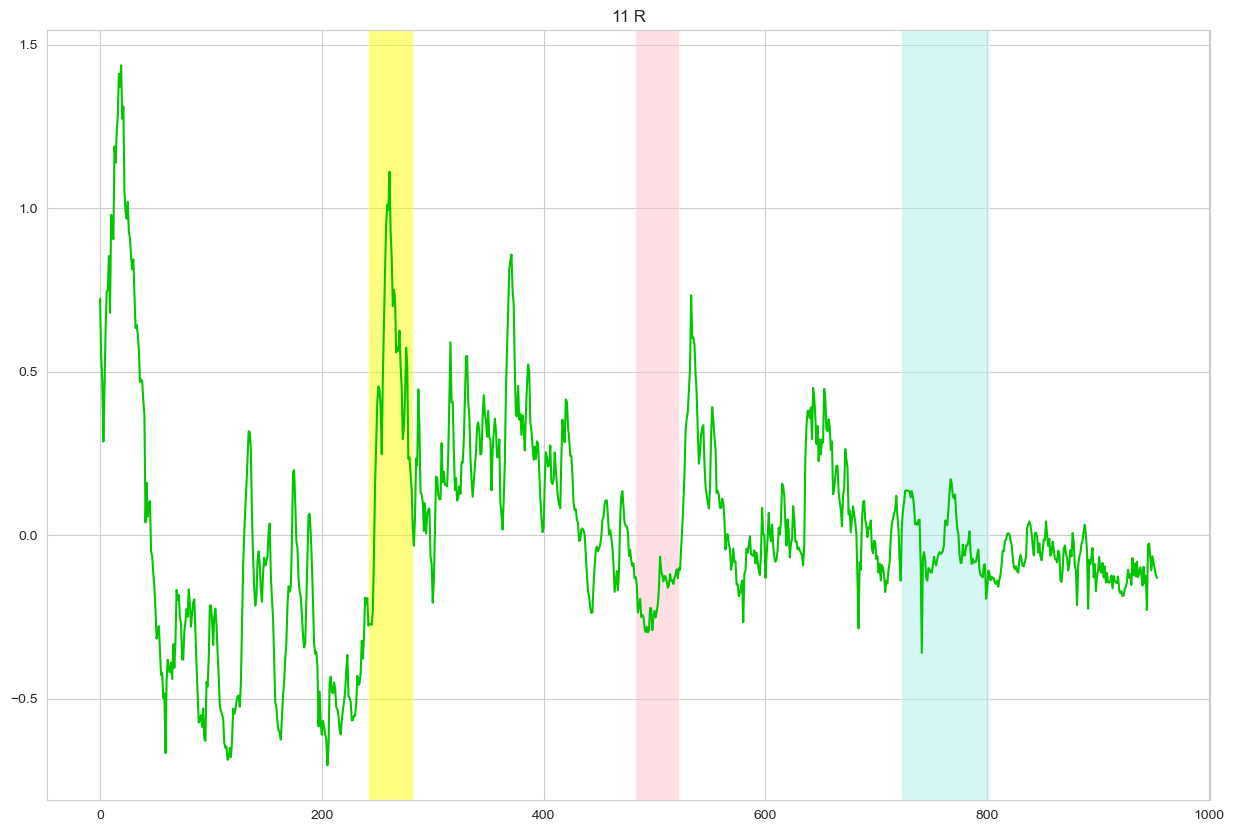

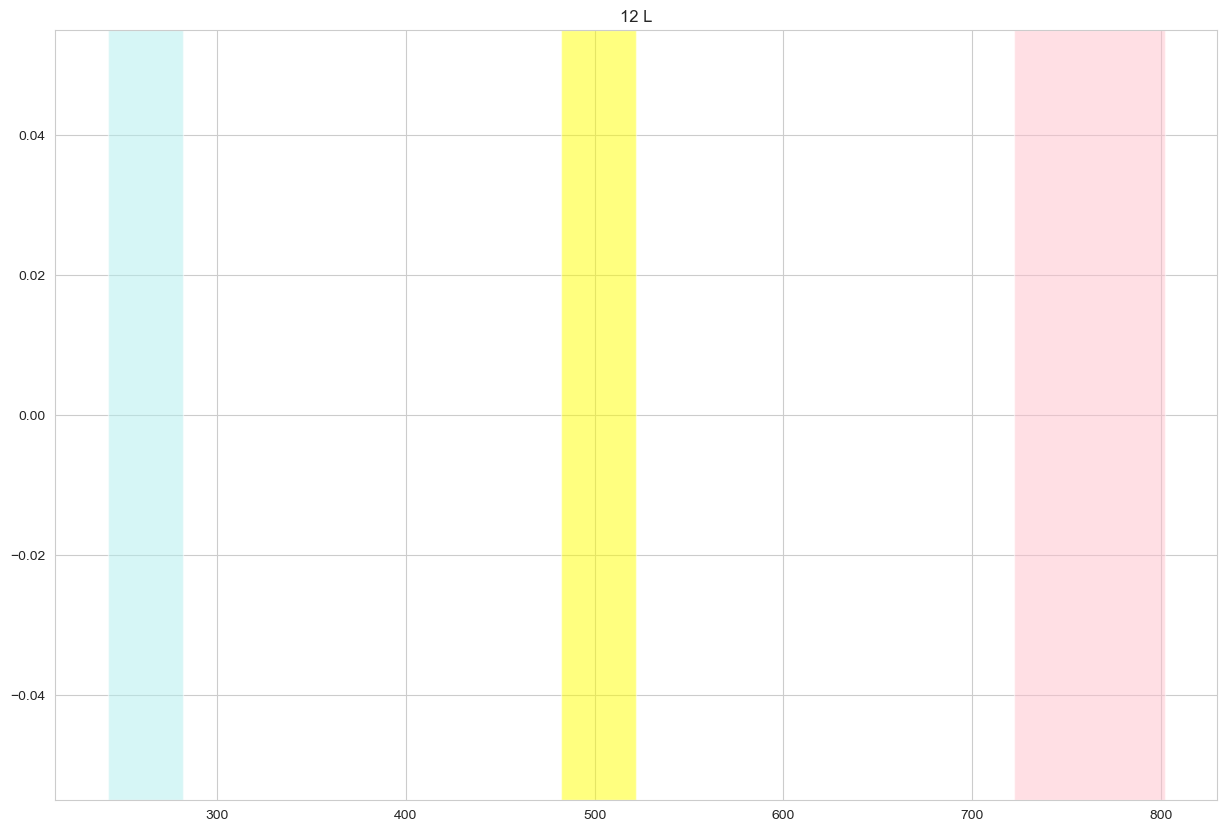

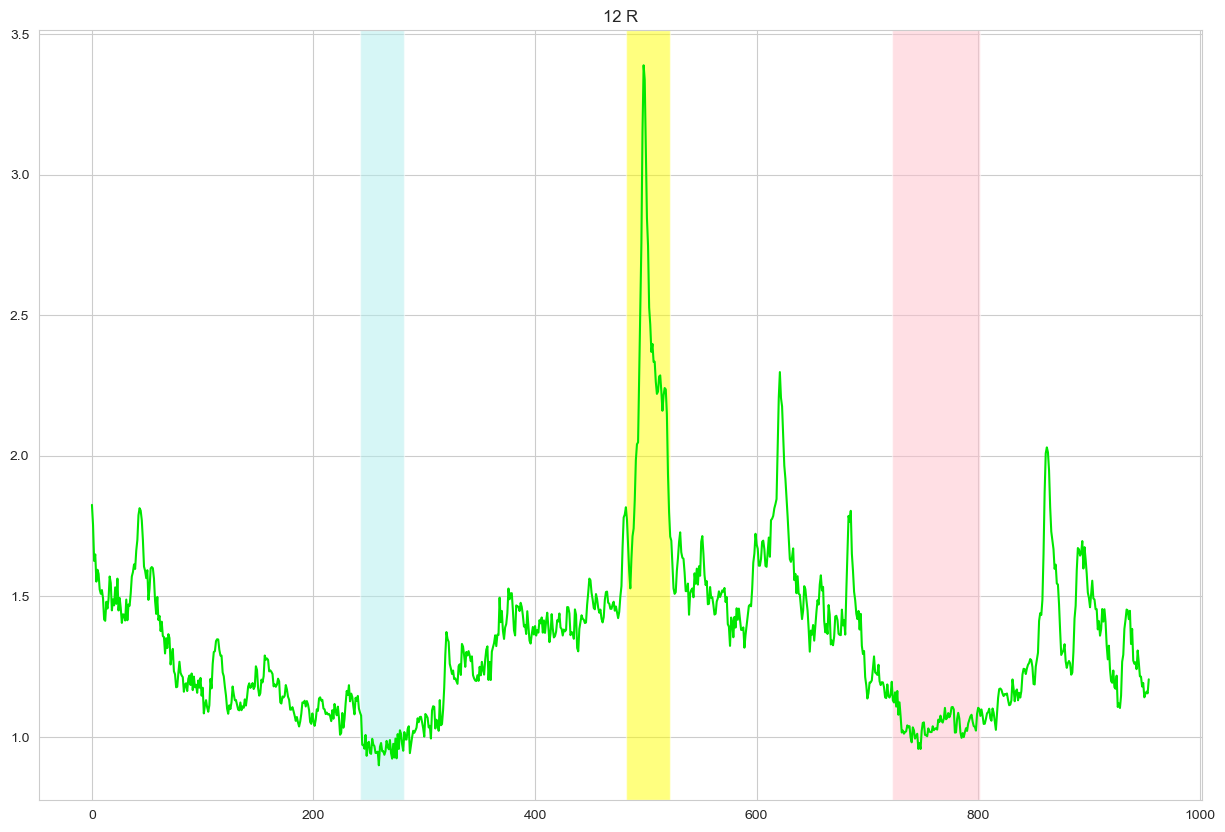

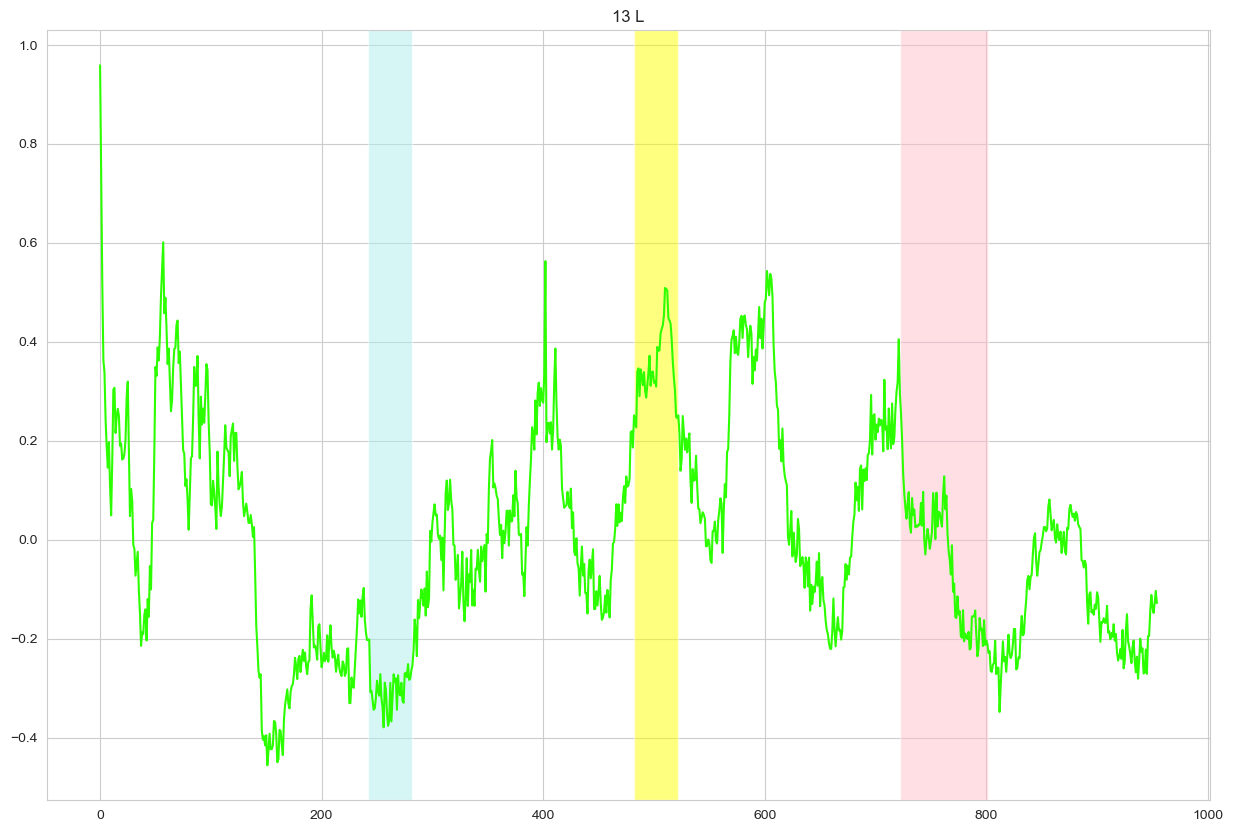

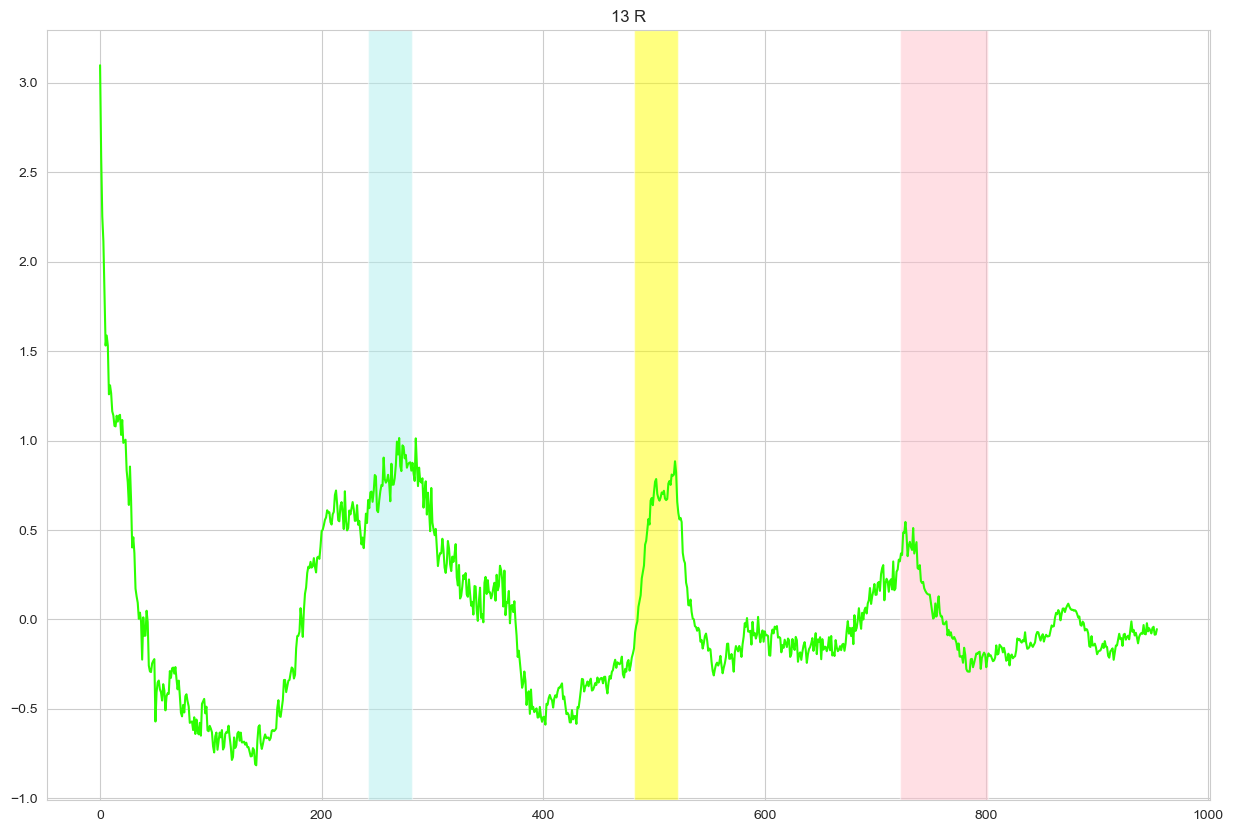

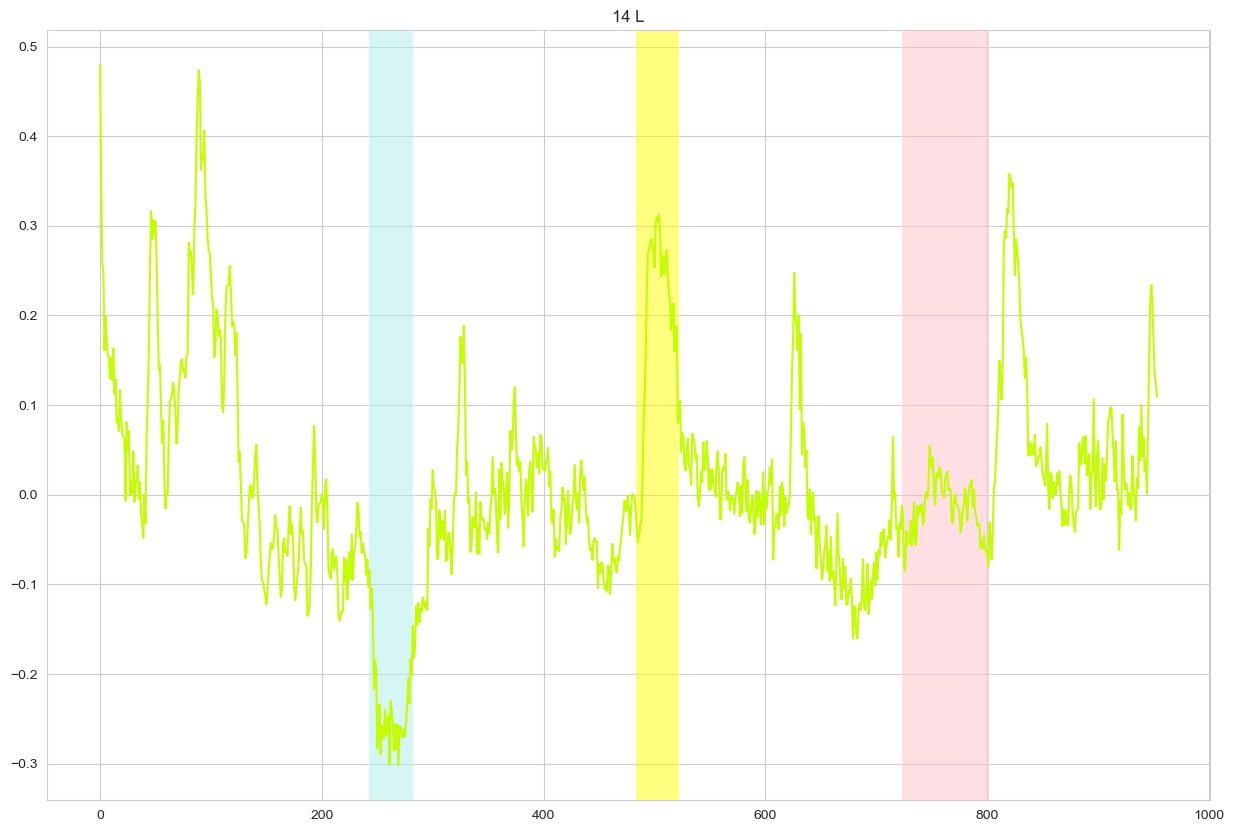

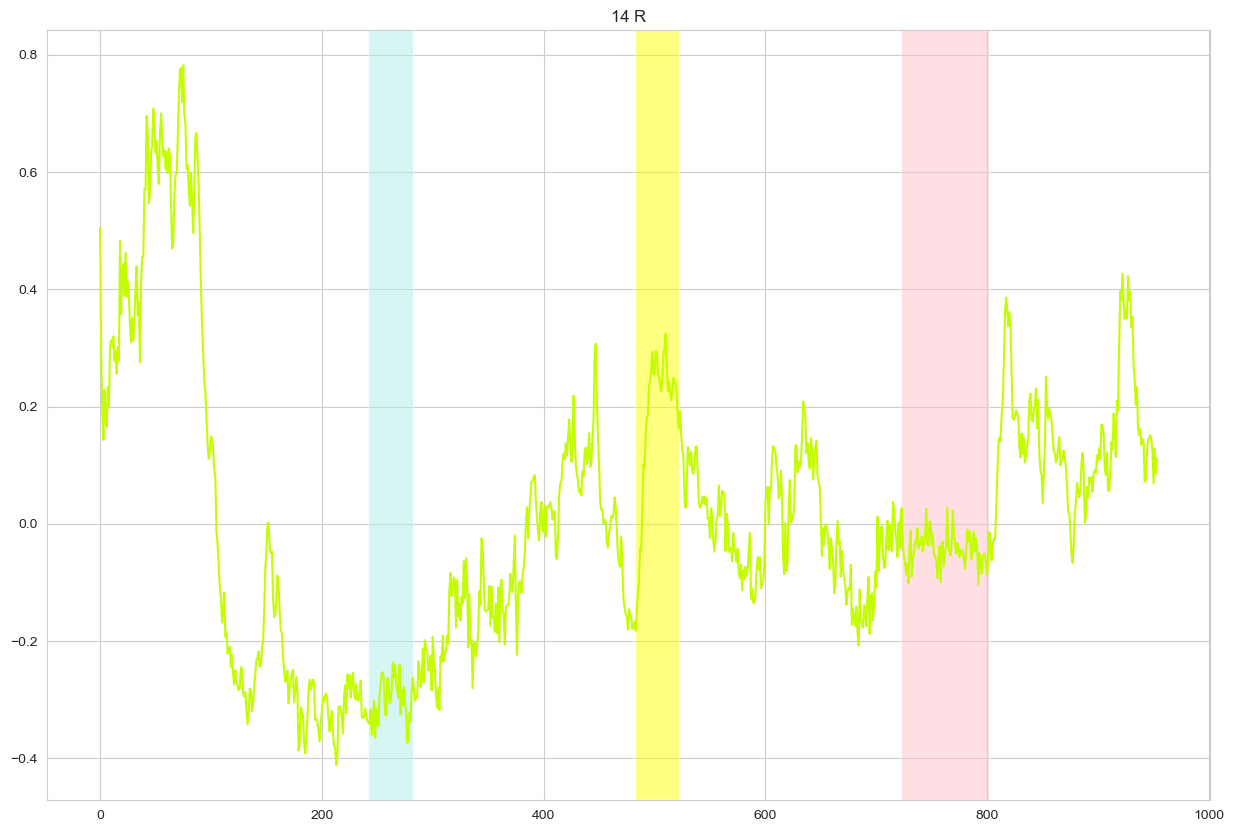

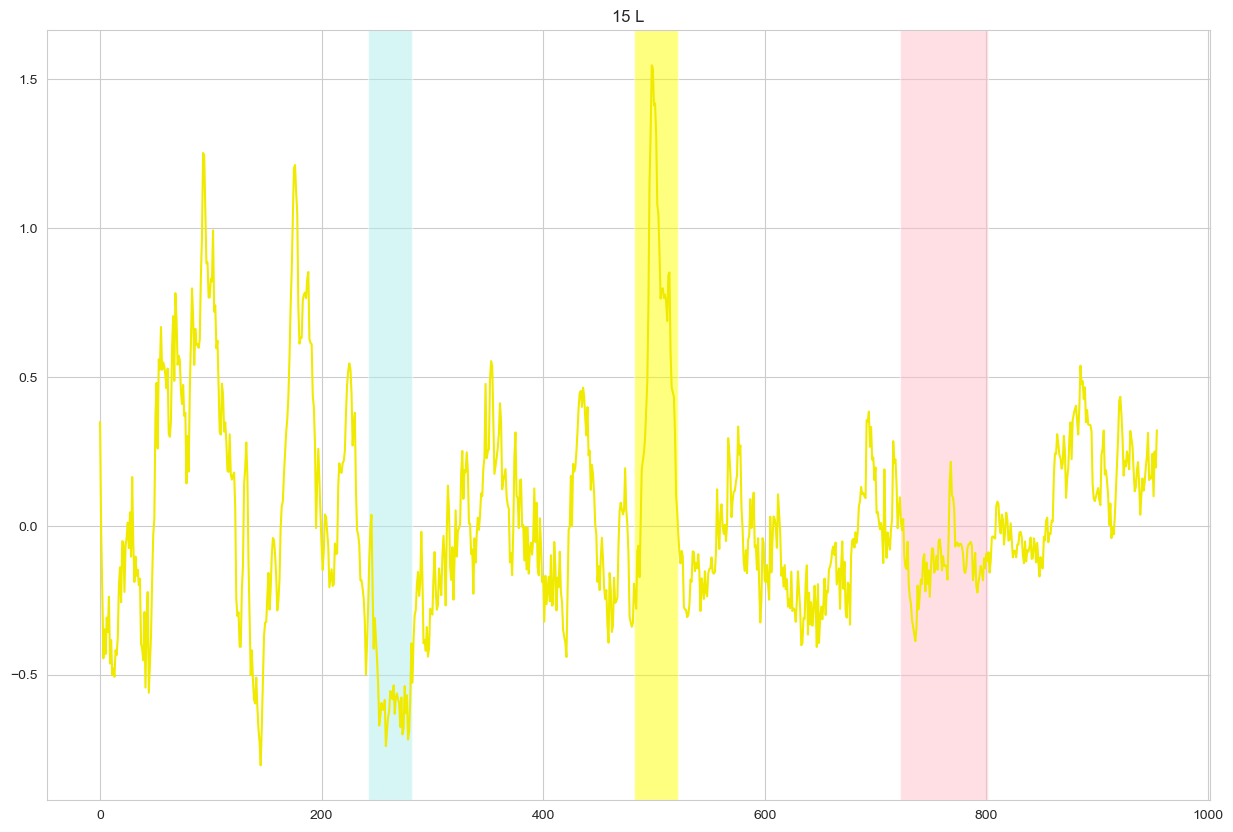

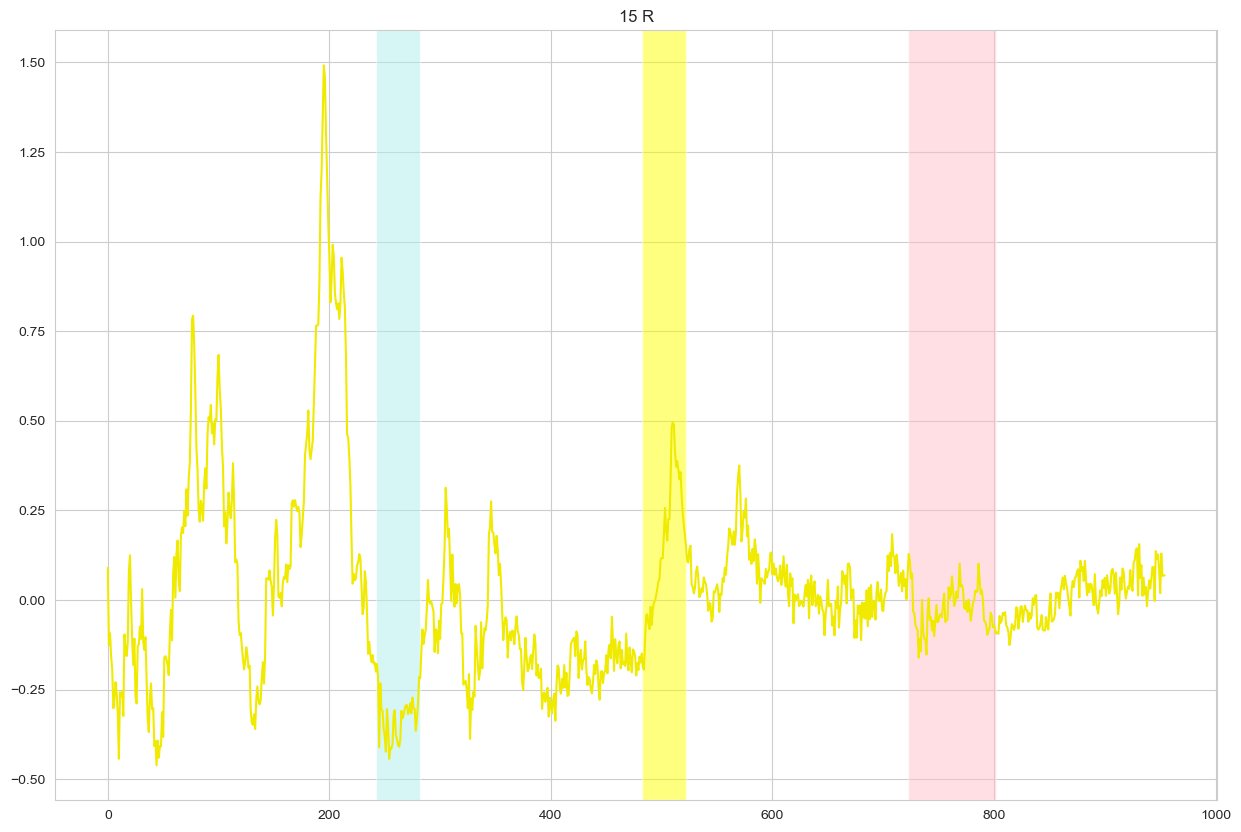

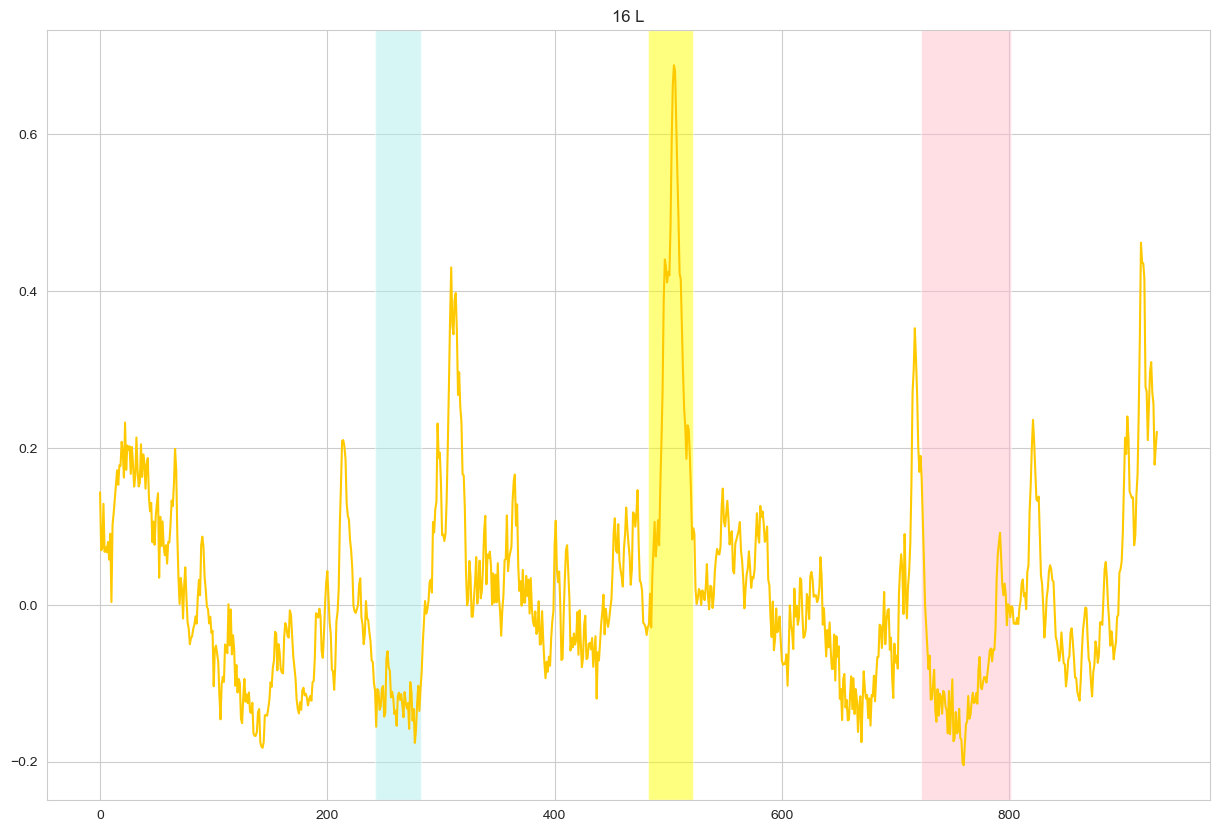

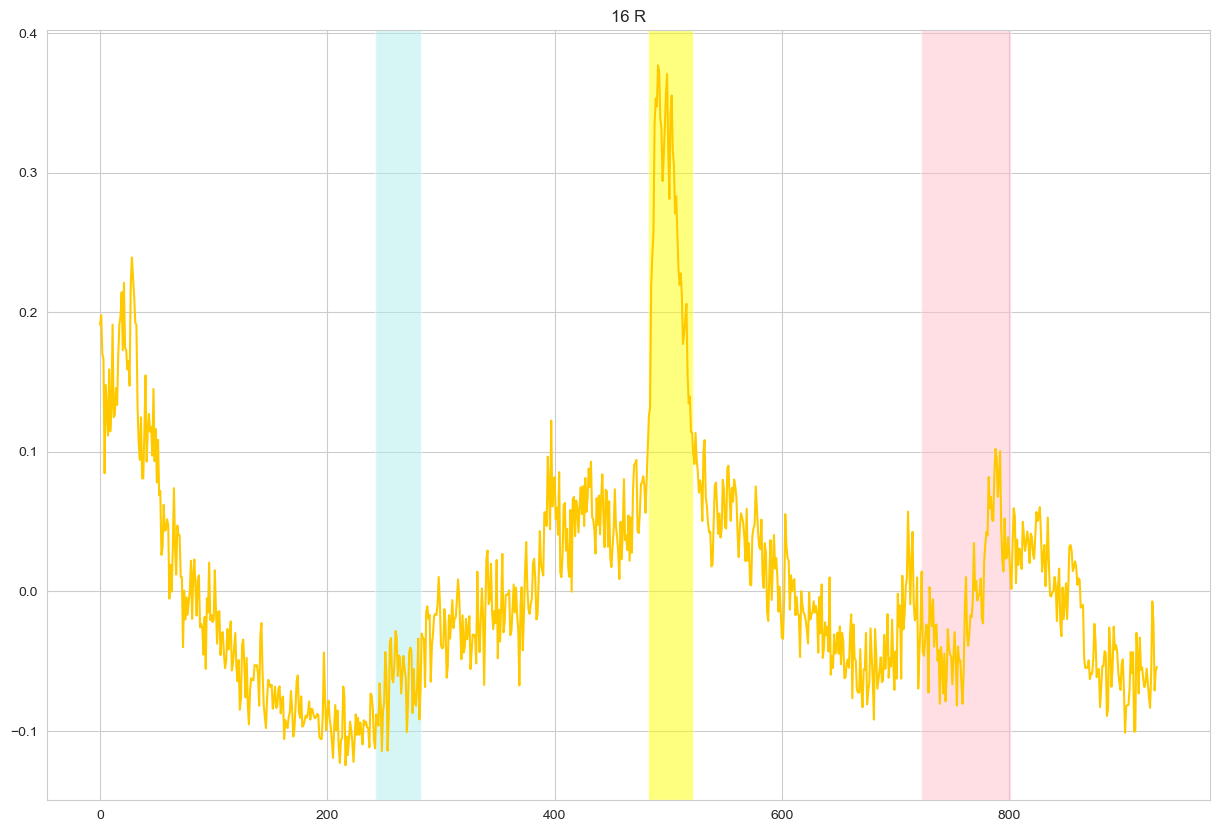

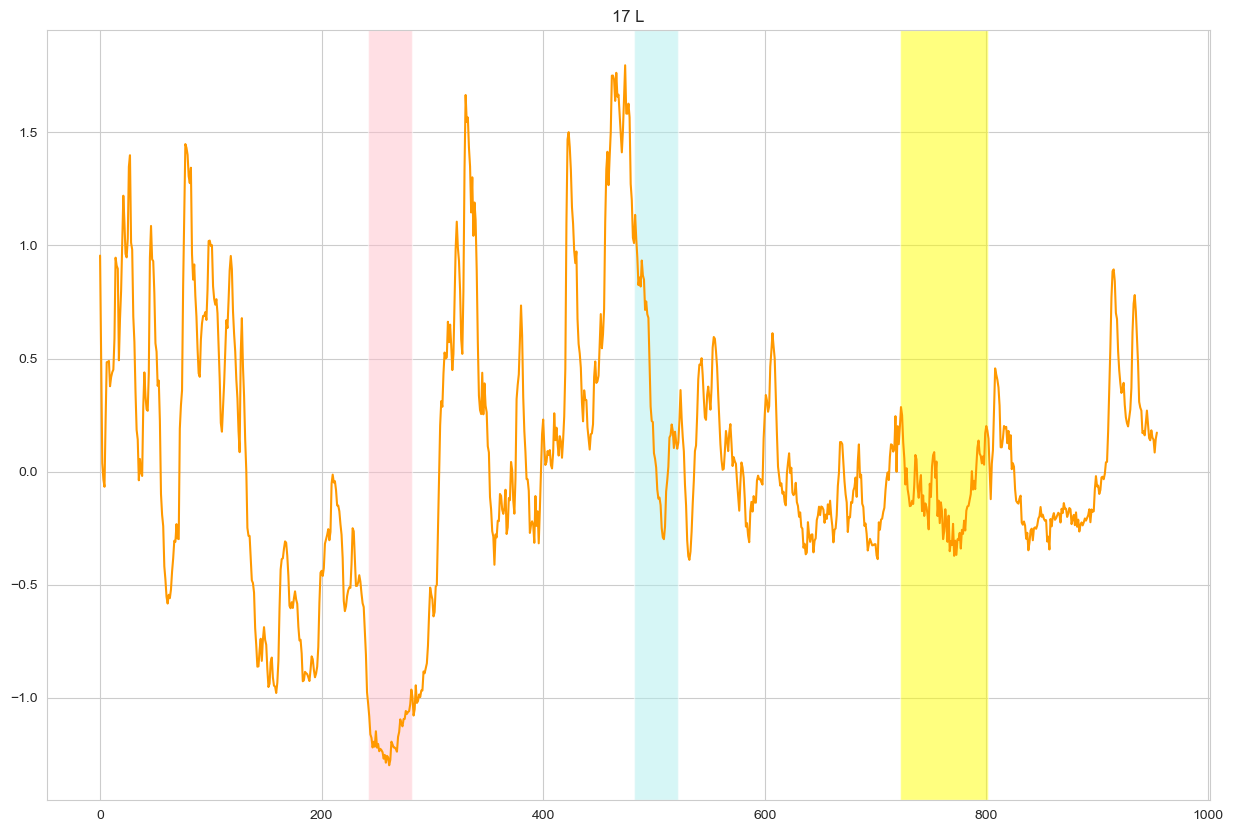

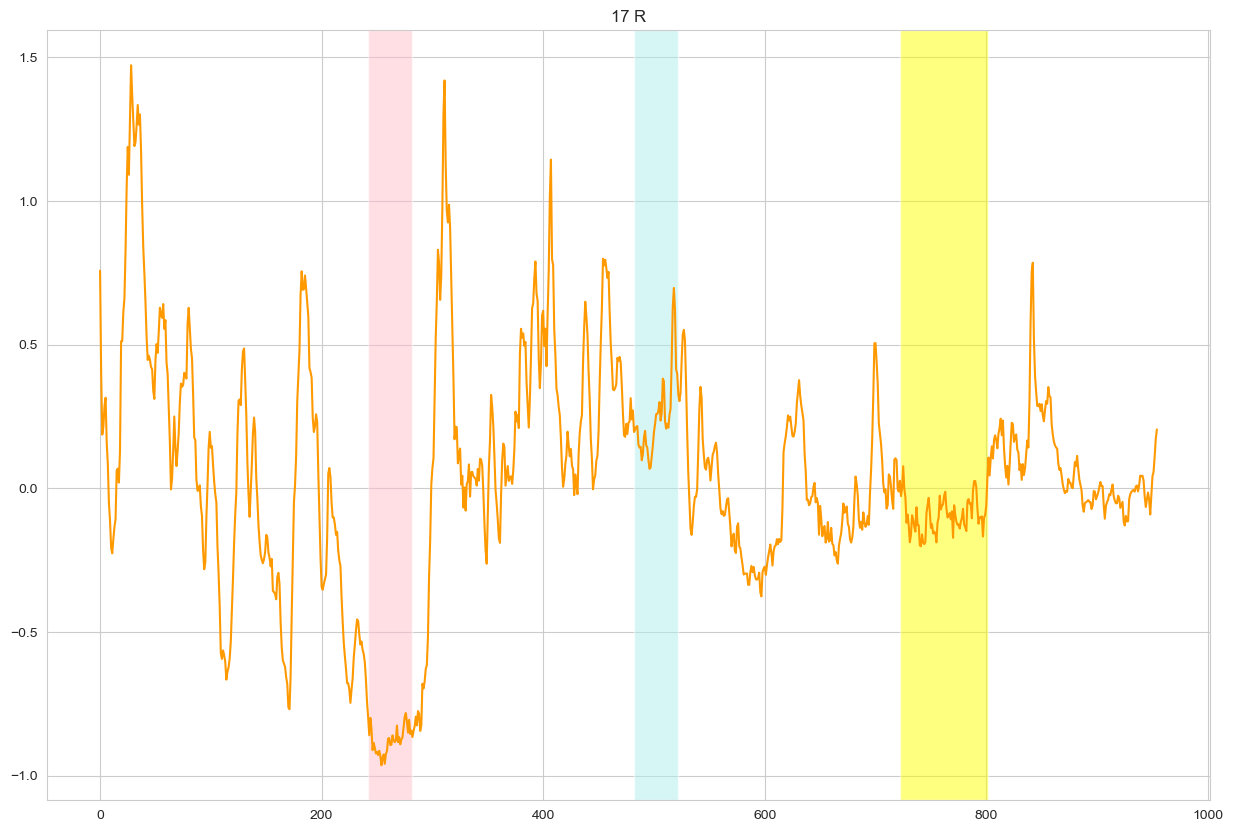

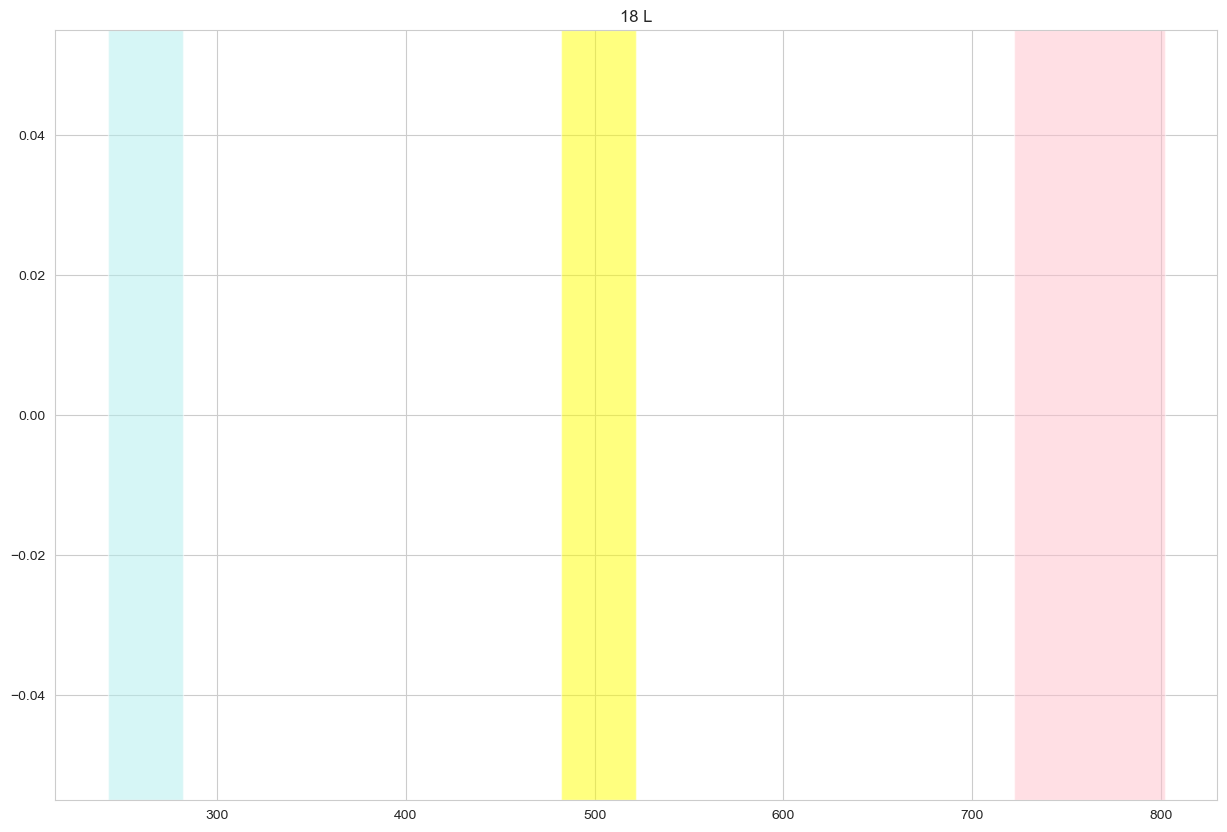

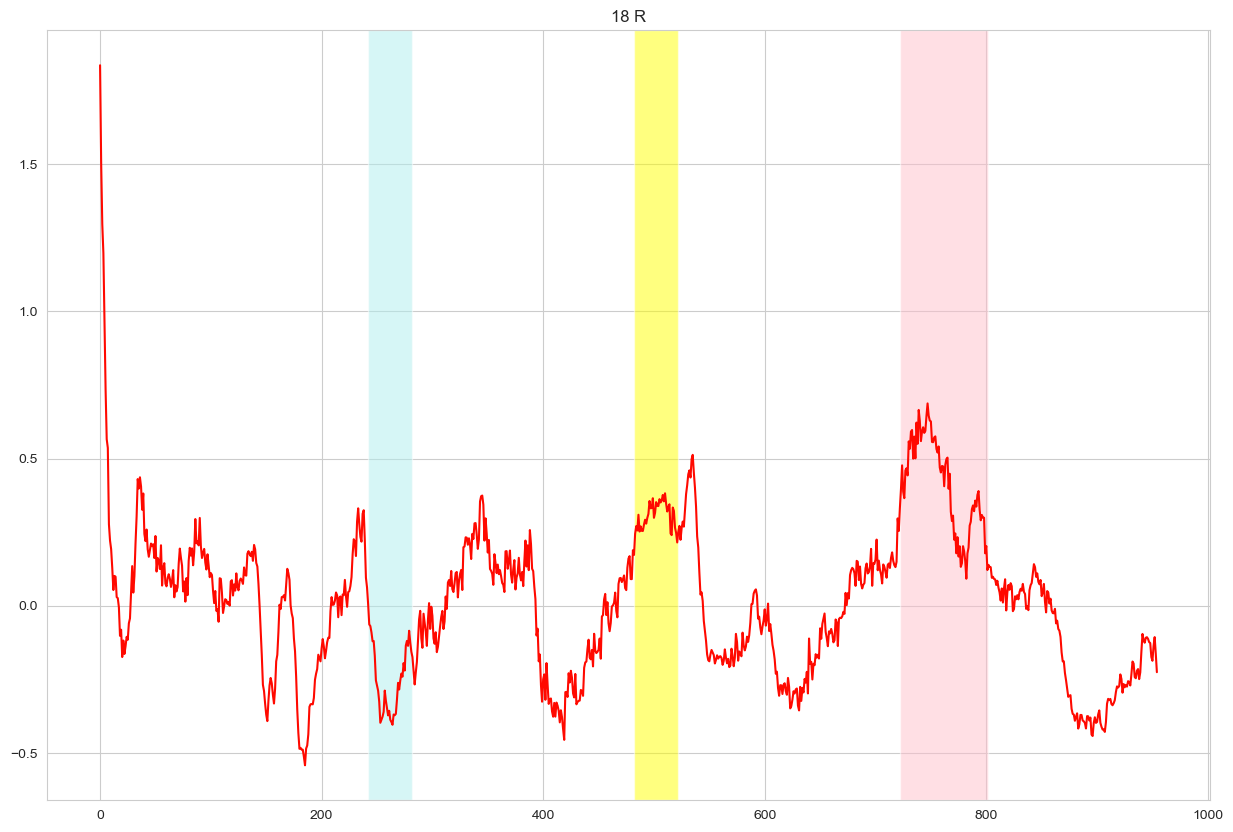

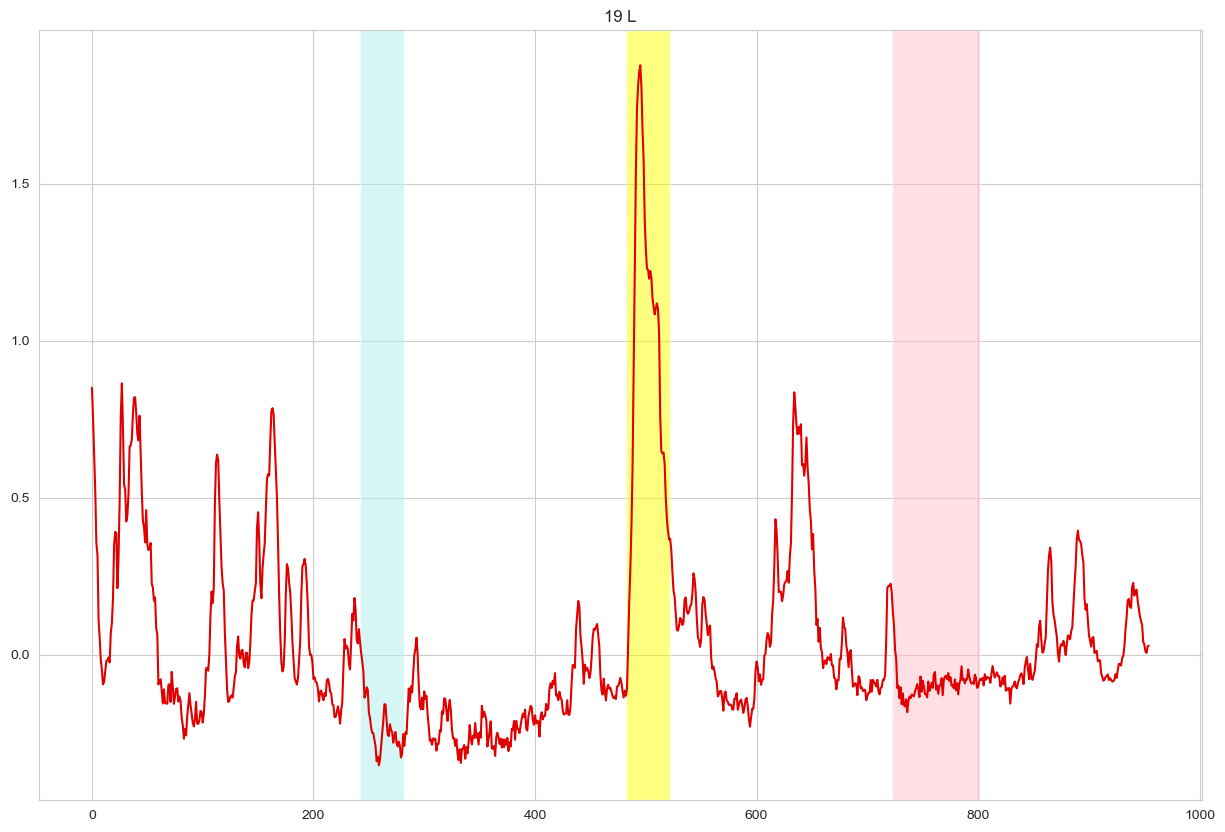

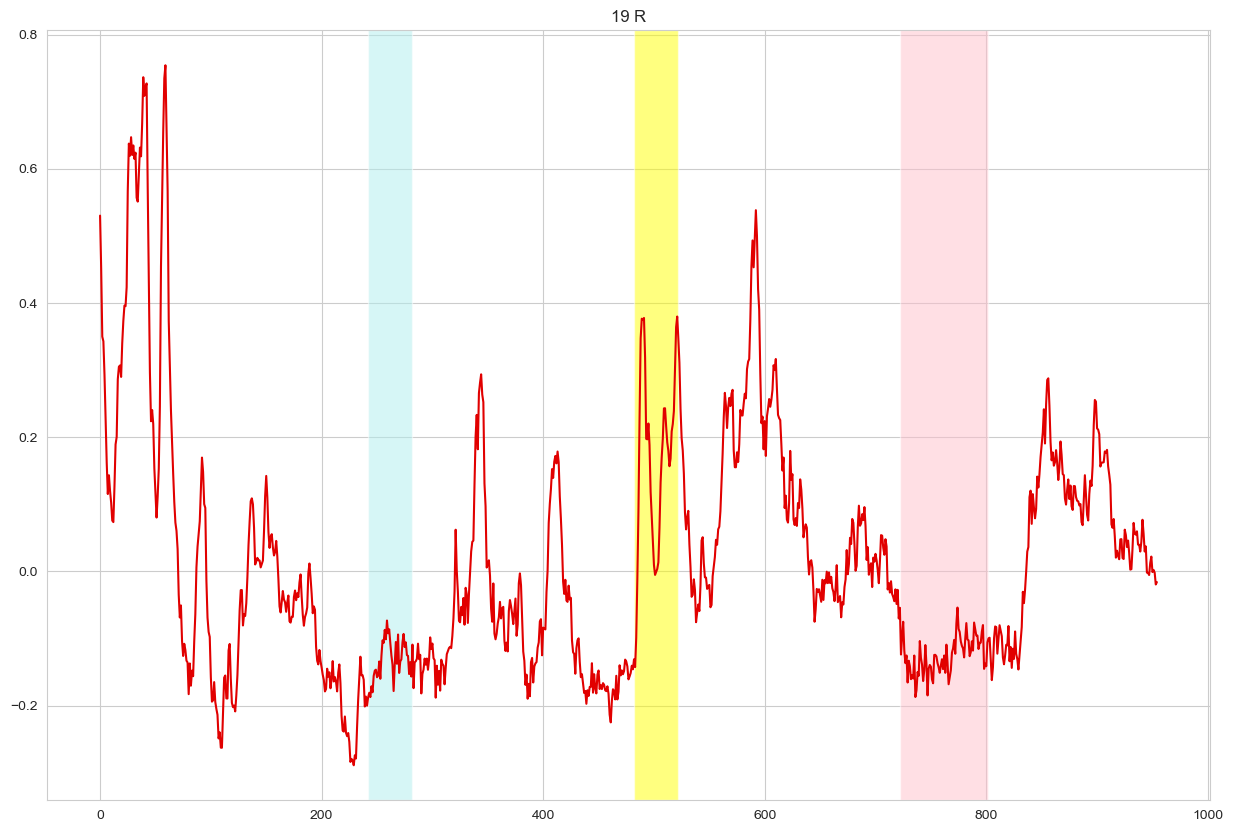

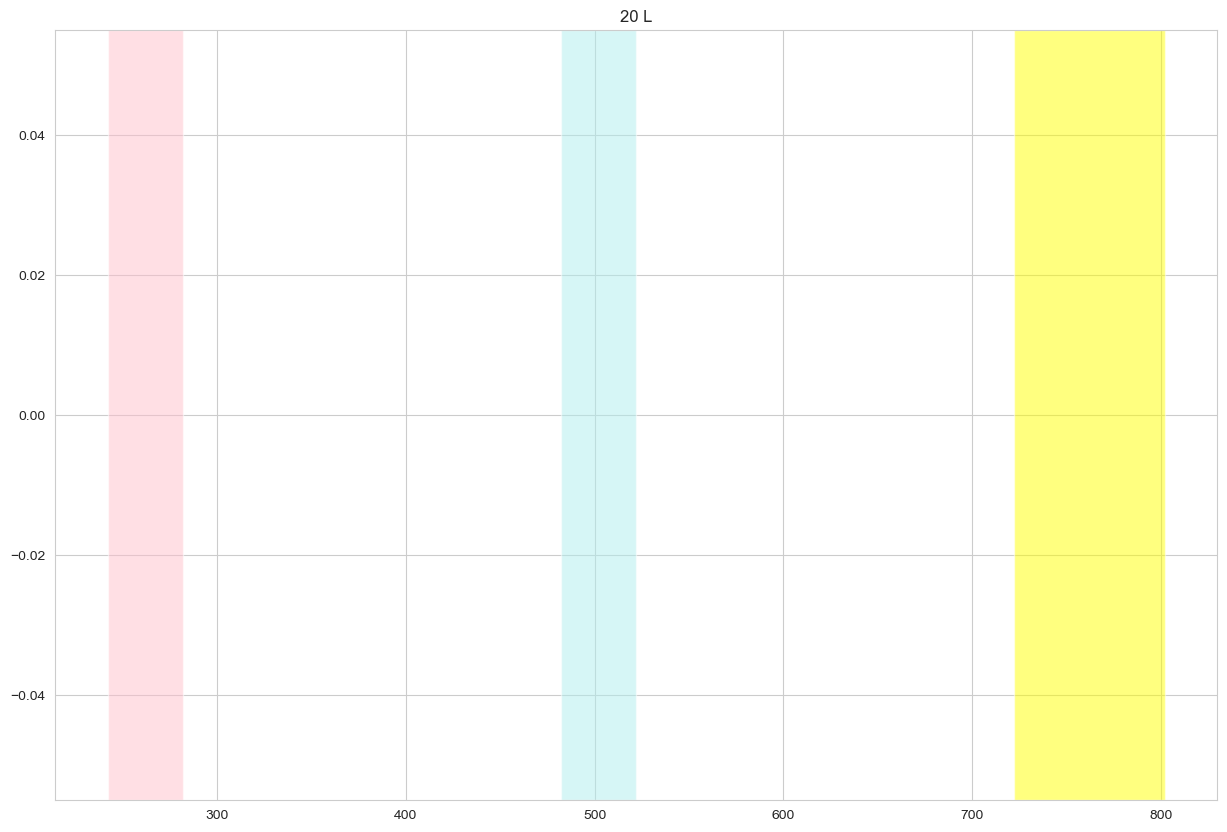

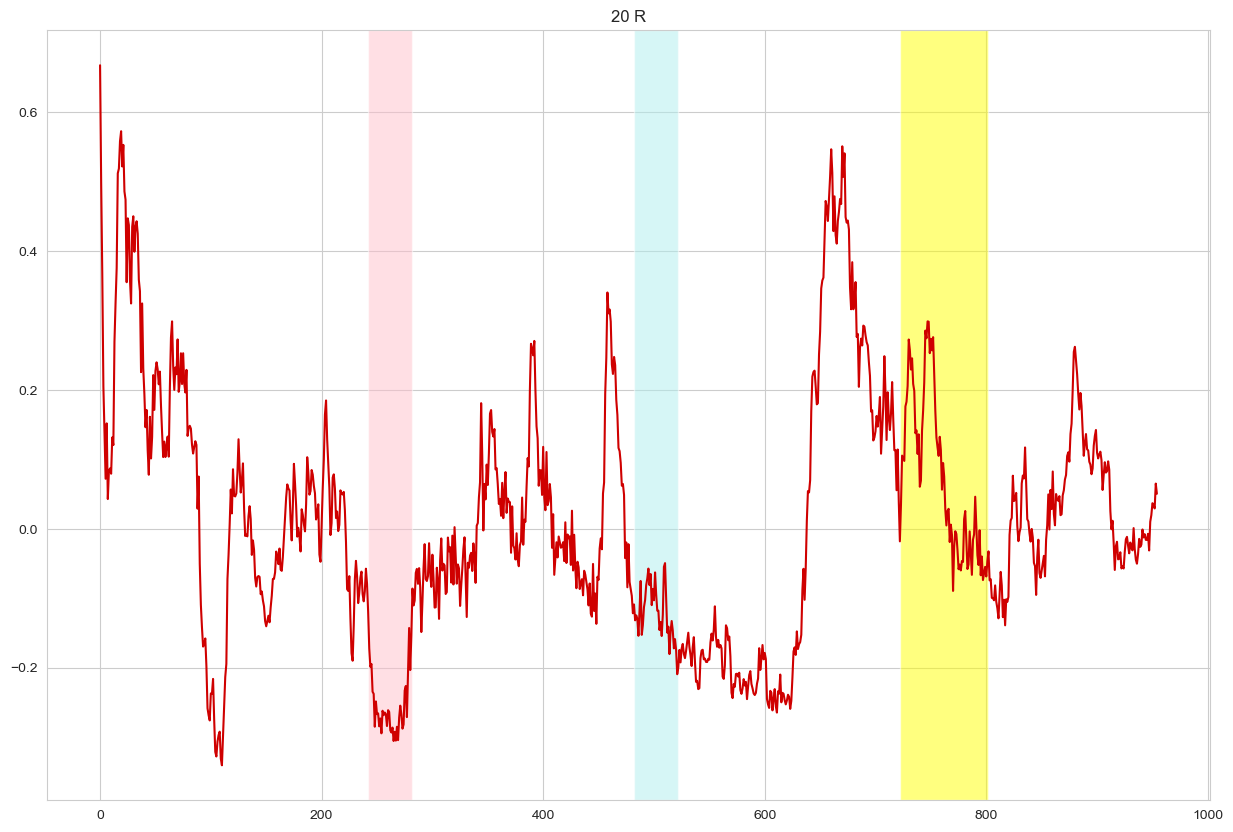

In [30]:
cmap = plt.get_cmap('nipy_spectral') #this is just to get that rainbow color effect for plotting the traces
#if you notice below for color = cmap(i * 12), this is because I wanted to space out the colors more to go from
# a wider range of rainbow colors
# you can google 'matplotlib colormap reference' for more info and a list of other colors. 
# I used 'nipy_spectral' to get a rainbow effect because it was pretty :) lol

count = 0
for i in range(0,21): #21 is because there's 21 trials
    fig, ax = plt.subplots(1,1, figsize=(15,10), facecolor='w') 
    ax.set_title(str(i) + ' L') #this is how I label each trial from 0-21 by using i
    ax.plot(ASJ_L[i], color = cmap(i*12)) 
    ax.axvspan(242, 282, facecolor=color1[i], alpha = 0.5) 
    ax.axvspan(482, 522, facecolor=color2[i], alpha = 0.5) 
    ax.axvspan(722, 802, facecolor=color3[i], alpha = 0.5)
    
    fig, ax = plt.subplots(1,1, figsize=(15,10), facecolor='w') 
    ax.set_title(str(i) + ' R')
    ax.plot(ASJ_R[i], color = cmap(i*12))
    ax.axvspan(242, 282, facecolor=color1[i], alpha = 0.5)
    ax.axvspan(482, 522, facecolor=color2[i], alpha = 0.5)
    ax.axvspan(722, 802, facecolor=color3[i], alpha = 0.5)
    count += 1